**Checklist**



1- Check all what is done is true and nothing is missing or wrongly made.

2- See what to do with the missing data after converting them to 'UNKNOWN' should we take further actions? or leave it like that.

3- As required we need to add visualizations to detect behavioral differences with important and useful meanings.

4- Like the output csv file that is created at the end 'provider_features.csv' we need to to the same steps but for the test datasets to have test_provider_features.csv. So we need to repeat the main steps that was made to train data and apply them to the test data.



## Big Picture

TRAIN DATA = (Train_Beneficiarydata.csv + Train_Inpatientdata.csv + Train_Outpatientdata.csv + Train_labels.csv)

TEST DATA = (Test_Beneficiarydata.csv + Test_Inpatientdata.csv + Test_Outpatientdata.csv + Test_labels.csv)

TRAIN DATA  →  CLEAN  →  FEATURE ENGINEER  →  **provider_features.csv**

TEST DATA   →  CLEAN  →  FEATURE ENGINEER  →  **test_provider_features.csv**

(No need EDA for TEST DATA)

models = Decision Trees, Random Forest, Gradient Boosting, Logistic Regression, Support Vector Machines

Train model on **provider_features.csv**

Test  model on **test_provider_features.csv**

#Data Understanding & Exploration 1.5.1 and 1.5.2

##1 — Quick load

In [57]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd
bene = pd.read_csv('/content/drive/MyDrive/Train_Beneficiarydata.csv')
bene.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [59]:
inp = pd.read_csv('/content/drive/MyDrive/Train_Inpatientdata.csv')
inp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [60]:
outp = pd.read_csv('/content/drive/MyDrive/Train_Outpatientdata.csv')
outp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [61]:
labels = pd.read_csv('/content/drive/MyDrive/Train_labels.csv')
labels.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


##2 — Examine relationships, join keys & levels of granularity


Between **`bene` DataFrame** and **`inp` and `outp` DataFrames**
- **`bene` DataFrame**: The `BeneID` column serves as the primary key, uniquely identifying each beneficiary. Each row in this DataFrame represents a single, distinct beneficiary (paitent) and contains their demographic information and chronic conditions.

- **`inp` and `outp` DataFrames**: Both the `inp` (inpatient claims) and `outp` (outpatient claims) DataFrames also contain the `BeneID` column. This column acts as the foreign key, linking claims back to the specific beneficiary who received the services.

- **Common Join Key**: The `BeneID` column is the common key used to join the `bene` DataFrame with both the `inp` and `outp` DataFrames.

- **Granularity and Relationship**: The relationship between `bene` and both `inp` and `outp` is one-to-many. A single beneficiary (`BeneID`) can be associated with multiple inpatient claims in the `inp` DataFrame and multiple outpatient claims in the `outp` DataFrame. This means that for each unique `BeneID` in the `bene` DataFrame, there can be **zero**, **one**, or **many** corresponding entries in the `inp` and `outp` DataFrames.

Between **`inp`** and **`outp`** and **`labels`**





*  **Common Join Key**: The common key linking the `inp` (inpatient claims) and `outp` (outpatient claims) DataFrames to the `labels` DataFrame is the **`Provider`** column.



*  **Granularity and Relationship**:
    *   A single `Provider` in the `labels` DataFrame can be associated with multiple inpatient claims in the `inp` DataFrame.
    *   Similarly, a single `Provider` in the `labels` DataFrame can be associated with multiple outpatient claims in the `outp` DataFrame.
    *   Conversely, each `Provider` in the `labels` DataFrame has a single `PotentialFraud` label associated with it.
    *   The `inp` and `outp` DataFrames are at the **claim level**, meaning each row represents an individual inpatient or outpatient claim.
    *   The `labels` DataFrame is at the **provider level**, with each row representing a unique provider and their associated fraud status. Each claim (in `inp` or `outp`) is associated with one provider, and each provider has one fraud status.

##3 — Assess data quality and completeness, identifying missing values and inconsistencies.


For each table:

* **Missing values**: count nulls per column *(especially Provider, InscClaimAmtReimbursed, date fields, diagnosis/procedure codes)*.

* **Inconsistent encodings**: e.g., ChronicCond_* may be 1/2/NA or Y/N — unify to 0/1.

* **Date formats**: convert DD/MM/YYYY or MM/DD/YYYY to datetime.

* **Duplicates**: duplicate ClaimID rows.

* **Outliers**: extremely large InscClaimAmtReimbursed values (could be fraud signal or data error).

* **Provider overlap**: providers in labels but no claims, or providers with claims and no label — handle carefully (drop or mark as unlabeled).

* **Inpatient/outpatient alignment**: same claim dates outside expected ranges.

In [62]:
# Show DISTINCT values for every column
print("DISTINCT values in Outpatient Dataset ")
for col in outp.columns:
    print(f"\nColumn: {col}")
    print(outp[col].unique())
print("--------------------------------------")
print("DISTINCT values in Inpatient Dataset ")
for col in inp.columns:
    print(f"\nColumn: {col}")
    print(inp[col].unique())
print("--------------------------------------")
print("DISTINCT values in Beneficiary Dataset ")
for col in bene.columns:
    print(f"\nColumn: {col}")
    print(bene[col].unique())
print("--------------------------------------")

DISTINCT values in Outpatient Dataset 

Column: BeneID
['BENE11002' 'BENE11003' 'BENE11004' ... 'BENE159196' 'BENE159197'
 'BENE159198']

Column: ClaimID
['CLM624349' 'CLM189947' 'CLM438021' ... 'CLM596444' 'CLM636992'
 'CLM686139']

Column: ClaimStartDt
['2009-10-11' '2009-02-12' '2009-06-27' '2009-01-06' '2009-01-22'
 '2009-02-03' '2009-03-03' '2009-03-18' '2009-04-25' '2009-05-04'
 '2009-08-17' '2009-09-06' '2009-10-13' '2009-12-09' '2009-12-22'
 '2009-01-31' '2009-02-02' '2009-03-19' '2009-04-02' '2009-09-30'
 '2009-10-29' '2009-10-12' '2009-04-30' '2009-05-10' '2009-05-15'
 '2009-09-24' '2009-03-04' '2009-04-20' '2009-05-11' '2009-10-31'
 '2009-01-18' '2009-05-08' '2009-08-04' '2009-03-06' '2009-03-29'
 '2009-04-03' '2009-04-08' '2009-05-06' '2009-05-19' '2009-06-26'
 '2009-07-08' '2009-07-11' '2009-07-14' '2009-08-25' '2009-09-13'
 '2009-10-09' '2009-10-14' '2009-01-29' '2009-03-05' '2009-06-07'
 '2009-07-24' '2009-08-26' '2009-08-13' '2009-12-25' '2009-02-01'
 '2009-02-16' '2009

In [63]:
# to see rows + columns (no. of rows, no. of columns)
print("Outpatient:", outp.shape)
print("Inpatient:", inp.shape)
print("Beneficiary:", bene.shape)
print("Labels:", labels.shape)


Outpatient: (517737, 27)
Inpatient: (40474, 30)
Beneficiary: (138556, 25)
Labels: (5410, 2)


In [64]:
# Assess missing values in outp DataFrame
print("Missing values in outp DataFrame:\n")
print(outp.isnull().sum())
print("-----------------------------------")

# Assess missing values in labels DataFrame
print("Missing values in labels DataFrame:\n")
print(labels.isnull().sum())
print("-----------------------------------")

# Assess missing values in bene DataFrame
print("Missing values in bene DataFrame:\n")
print(bene.isnull().sum())
print("-----------------------------------")

#Assess missing values in inp DataFrame
print("Missing values in inp DataFrame:\n")
print(inp.isnull().sum())
print("-----------------------------------")

Missing values in outp DataFrame:

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64
-----------------------------------
Missing values in labels 

In [65]:
# Find Missing Percentages in the three datasets
print("Outpatient missing %:")
print((outp.isnull().sum() / len(outp)) * 100)

print("\nInpatient missing %:")
print((inp.isnull().sum() / len(inp)) * 100)

print("\nBeneficiary missing %:")
print((bene.isnull().sum() / len(bene)) * 100)

Outpatient missing %:
BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosi

In [66]:
# Handle missing data in (outp) DataFrame
# Drop the ClmProcedureCode_1 through ClmProcedureCode_6 columns from the outp DataFrame and verify the remaining columns.
columns_to_drop = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']
outp.drop(columns=columns_to_drop, inplace=True)
print("Outp DataFrame after dropping ClmProcedureCode columns:")
outp.info()

# Drop the ClmDiagnosisCode_5 through ClmProcedureCode_10 columns from the outp DataFrame and verify the remaining columns.
columns_to_drop = ['ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']
outp.drop(columns=columns_to_drop, inplace=True)
print("Outp DataFrame after dropping ClmDiagnosisCode columns:")
outp.info()

# Drop 'OperatingPhysician' and 'ClmAdmitDiagnosisCode' columns from the outp DataFrame due to their high percentage of missing values, and then verify the remaining columns.
columns_to_drop_physician = ['OperatingPhysician', 'ClmAdmitDiagnosisCode']
outp.drop(columns=columns_to_drop_physician, inplace=True)
print("Outp DataFrame after dropping OperatingPhysician and ClmAdmitDiagnosisCode columns:")
outp.info()

#Handle missing data in (inp) DataFrame
# Drop the ClmProcedureCode_2 through ClmProcedureCode_6 columns from the inp DataFrame due to their extremely high percentage of missing values, and then verify the remaining columns.
columns_to_drop_inp = ['ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']
inp.drop(columns=columns_to_drop_inp, inplace=True)
print("Inp DataFrame after dropping ClmProcedureCode columns:")
inp.info()

# Drop 'ClmDiagnosisCode_10' and 'OtherPhysician' columns from the inp DataFrame due to their high percentage of missing values, and then verify the remaining columns.
columns_to_drop_physician_inp = ['ClmDiagnosisCode_10','OtherPhysician']
inp.drop(columns=columns_to_drop_physician_inp, inplace=True)
print("Inp DataFrame after dropping ClmDiagnosisCode_10 and OtherPhysician columns:")
inp.info()

Outp DataFrame after dropping ClmProcedureCode columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   BeneID                  517737 non-null  object
 1   ClaimID                 517737 non-null  object
 2   ClaimStartDt            517737 non-null  object
 3   ClaimEndDt              517737 non-null  object
 4   Provider                517737 non-null  object
 5   InscClaimAmtReimbursed  517737 non-null  int64 
 6   AttendingPhysician      516341 non-null  object
 7   OperatingPhysician      90617 non-null   object
 8   OtherPhysician          195046 non-null  object
 9   ClmDiagnosisCode_1      507284 non-null  object
 10  ClmDiagnosisCode_2      322357 non-null  object
 11  ClmDiagnosisCode_3      203257 non-null  object
 12  ClmDiagnosisCode_4      125596 non-null  object
 13  ClmDiagnosisCode_5      74344 non

In [67]:
print(bene.columns)
print(inp.columns)
print(outp.columns)
print(labels.columns)


Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')
Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagno

We will not fill **`DOD`** column — it just means the person is alive.

In [68]:
# We will fill the rest with 'UNKNOWN' for the categorical columns and by median for numerical
bene = bene.fillna({
    'State': 'UNKNOWN',
    'County': 'UNKNOWN',
    'RenalDiseaseIndicator': 0,
    'NoOfMonths_PartACov': bene['NoOfMonths_PartACov'].median(),
    'NoOfMonths_PartBCov': bene['NoOfMonths_PartBCov'].median(),
    'IPAnnualReimbursementAmt': bene['IPAnnualReimbursementAmt'].median(),
    'IPAnnualDeductibleAmt': bene['IPAnnualDeductibleAmt'].median(),
    'OPAnnualReimbursementAmt': bene['OPAnnualReimbursementAmt'].median(),
    'OPAnnualDeductibleAmt': bene['OPAnnualDeductibleAmt'].median()
})

# As for the chronic columns we use mode
chronic_cols = [col for col in bene.columns if 'ChronicCond' in col]

for col in chronic_cols:
    bene[col].fillna(bene[col].mode()[0], inplace=True)

/tmp/ipython-input-214544408.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bene[col].fillna(bene[col].mode()[0], inplace=True)
/tmp/ipython-input-214544408.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [69]:
# Handle remaining missing values in claims (inp & outp) data and paitents data
# remaining missing values in the (inp) DataFrame.
inp.fillna({
    'Provider': 'UNKNOWN',
    'InscClaimAmtReimbursed': 'UNKNOWN',
    'AttendingPhysician': 'UNKNOWN',
    'OperatingPhysician': 'UNKNOWN',
    'AdmissionDt': 'UNKNOWN',
    'ClmAdmitDiagnosisCode': 'UNKNOWN',
    'DischargeDt': 'UNKNOWN',
    'DiagnosisGroupCode': 'UNKNOWN',
    'ClmProcedureCode_1': 'UNKNOWN',

}, inplace=True)

diagnosis_cols_inp = [col for col in inp.columns if 'ClmDiagnosisCode_' in col]
for col in diagnosis_cols_inp:
    inp[col].fillna('UNKNOWN', inplace=True)

inp['DeductibleAmtPaid'].fillna(inp['DeductibleAmtPaid'].median(), inplace=True)

/tmp/ipython-input-4143960590.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inp[col].fillna('UNKNOWN', inplace=True)
/tmp/ipython-input-4143960590.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [70]:
# remaining missing values in the (outp) DataFrame.
outp['AttendingPhysician'] = outp['AttendingPhysician'].fillna('UNKNOWN')
outp['OtherPhysician'] = outp['OtherPhysician'].fillna('UNKNOWN')
outp['DeductibleAmtPaid'] = outp['DeductibleAmtPaid'].fillna('UNKNOWN')

# from ClmDiagnosisCode_1 to ClmDiagnosisCode_4
diagnosis_cols_outp = [col for col in outp.columns if 'ClmDiagnosisCode_' in col]
for col in diagnosis_cols_outp:
    outp[col] = outp[col].fillna('UNKNOWN')

In [71]:
# remaining missing values in the (bene) DataFrame.
bene['DOD'] = bene['DOD'].fillna('Not Dead')

In [72]:
# Assess missing values in outp DataFrame
print("Missing values in outp DataFrame:\n")
print(outp.isnull().sum())
print("-----------------------------------")

# Assess missing values in labels DataFrame
print("Missing values in labels DataFrame:\n")
print(labels.isnull().sum())
print("-----------------------------------")

# Assess missing values in bene DataFrame
print("Missing values in bene DataFrame:\n")
print(bene.isnull().sum())
print("-----------------------------------")

#Assess missing values in inp DataFrame
print("Missing values in inp DataFrame:\n")
print(inp.isnull().sum())
print("-----------------------------------")

Missing values in outp DataFrame:

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OtherPhysician            0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
DeductibleAmtPaid         0
dtype: int64
-----------------------------------
Missing values in labels DataFrame:

Provider          0
PotentialFraud    0
dtype: int64
-----------------------------------
Missing values in bene DataFrame:

BeneID                             0
DOB                                0
DOD                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer

Summary:

Data Analysis Key Findings

*   **`ClmProcedureCode` Columns Removal**: Six `ClmProcedureCode_X` columns were dropped from both the `outp` and `inp` DataFrames due to extremely high missing values.
    *   The `outp` DataFrame was reduced to 22 columns after this initial drop.
    *   The `inp` DataFrame was reduced to 26 columns.

*   **Physician Columns Removal**: 'OperatingPhysician' and 'OtherPhysician' columns were dropped from both `outp` and `inp` DataFrames due to high missing values.
    *   The `outp` DataFrame was further reduced to 20 columns.
    *   The `inp` DataFrame was further reduced to 24 columns.

*   **Missing Value Imputation**: Remaining missing values in key columns were handled:
    *   'AttendingPhysician', 'ClmDiagnosisCode_X', and 'ClmAdmitDiagnosisCode' in both `inp` and `outp` DataFrames were filled with 'UNKNOWN'.
    *   'DeductibleAmtPaid' in the `inp` DataFrame was filled with 0.
    *   All targeted columns in both DataFrames now have zero missing values.

In [73]:
# Handle inconsistent encodings in bene DataFrame
print("Unique values in 'RenalDiseaseIndicator' column:\n")
print(bene['RenalDiseaseIndicator'].unique())

Unique values in 'RenalDiseaseIndicator' column:

['0' 'Y']


Based on the unique values found **('0' and 'Y')**, we will convert 'Y' to 1 and then convert the 'RenalDiseaseIndicator' column to an integer type.

In [74]:
bene['RenalDiseaseIndicator'] = bene['RenalDiseaseIndicator'].replace({'Y': 1, '0': 0}).astype(int)





/tmp/ipython-input-2022183605.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bene['RenalDiseaseIndicator'] = bene['RenalDiseaseIndicator'].replace({'Y': 1, '0': 0}).astype(int)


In [75]:
# Convert date formats in bene DataFrame
bene['DOB'] = pd.to_datetime(bene['DOB'])
bene['DOD'] = pd.to_datetime(bene['DOD'], errors='coerce')

# Convert date formats in inp DataFrame
inp['ClaimStartDt'] = pd.to_datetime(inp['ClaimStartDt'])
inp['ClaimEndDt'] = pd.to_datetime(inp['ClaimEndDt'])
inp['AdmissionDt'] = pd.to_datetime(inp['AdmissionDt'])
inp['DischargeDt'] = pd.to_datetime(inp['DischargeDt'])

# Convert date formats in outp DataFrame
outp['ClaimStartDt'] = pd.to_datetime(outp['ClaimStartDt'])
outp['ClaimEndDt'] = pd.to_datetime(outp['ClaimEndDt'])

/tmp/ipython-input-1144322028.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bene['DOD'] = pd.to_datetime(bene['DOD'], errors='coerce')


In [76]:
# In Beneficiary Dataset in Column: County = '0'
mode_county = bene['County'].mode()[0]
bene['County'].replace(0, mode_county, inplace=True)

/tmp/ipython-input-4192673965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bene['County'].replace(0, mode_county, inplace=True)


In [77]:
# Identify duplicate 'ClaimID' rows in inp and outp DataFrames
print(f"Number of duplicate ClaimIDs in inp DataFrame: {inp['ClaimID'].duplicated().sum()}")
print(f"Number of duplicate ClaimIDs in outp DataFrame: {outp['ClaimID'].duplicated().sum()}")

Number of duplicate ClaimIDs in inp DataFrame: 0
Number of duplicate ClaimIDs in outp DataFrame: 0


In [78]:
# Assess outliers in 'InscClaimAmtReimbursed' in inp and outp
print("Descriptive statistics for 'InscClaimAmtReimbursed' in inp DataFrame:\n")
print(inp['InscClaimAmtReimbursed'].describe())
print("\nDescriptive statistics for 'InscClaimAmtReimbursed' in outp DataFrame:\n")
print(outp['InscClaimAmtReimbursed'].describe())
print(f"\nMaximum 'InscClaimAmtReimbursed' in inp: {inp['InscClaimAmtReimbursed'].max()}")
print(f"Maximum 'InscClaimAmtReimbursed' in outp: {outp['InscClaimAmtReimbursed'].max()}")

Descriptive statistics for 'InscClaimAmtReimbursed' in inp DataFrame:

count     40474.000000
mean      10087.884074
std       10303.099402
min           0.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

Descriptive statistics for 'InscClaimAmtReimbursed' in outp DataFrame:

count    517737.000000
mean        286.334799
std         694.034343
min           0.000000
25%          40.000000
50%          80.000000
75%         200.000000
max      102500.000000
Name: InscClaimAmtReimbursed, dtype: float64

Maximum 'InscClaimAmtReimbursed' in inp: 125000
Maximum 'InscClaimAmtReimbursed' in outp: 102500



To identify claims with exceptionally high reimbursement amounts, I will filter the `inp` DataFrame for 'InscClaimAmtReimbursed' values greater than 100000 and the `outp` DataFrame for values greater than 50000, then display the resulting rows for each.

In [79]:
# Investigate InscClaimAmtReimbursed outliers in inp and outp
print("Inpatient claims with 'InscClaimAmtReimbursed' > 100000:")
print(inp[inp['InscClaimAmtReimbursed'] > 100000])

print("\nOutpatient claims with 'InscClaimAmtReimbursed' > 50000:")
print(outp[outp['InscClaimAmtReimbursed'] > 50000])

Inpatient claims with 'InscClaimAmtReimbursed' > 100000:
           BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
10      BENE11034  CLM57949   2009-07-01 2009-07-09  PRV55193   
708     BENE13669  CLM67392   2009-09-09 2009-10-14  PRV55172   
832     BENE14036  CLM54264   2009-06-05 2009-06-26  PRV54942   
3077    BENE22137  CLM59789   2009-07-15 2009-07-27  PRV52077   
4000    BENE25318  CLM34029   2009-01-16 2009-01-23  PRV51399   
4774    BENE28090  CLM45826   2009-04-06 2009-04-25  PRV57173   
5911    BENE32369  CLM31780   2008-12-31 2009-02-04  PRV52467   
12553   BENE57262  CLM75387   2009-11-10 2009-12-15  PRV51949   
18165   BENE77765  CLM59355   2009-07-12 2009-07-13  PRV53114   
19805   BENE83462  CLM65501   2009-08-26 2009-09-09  PRV53762   
20124   BENE84751  CLM31106   2008-12-19 2009-01-06  PRV52815   
21807   BENE90757  CLM75041   2009-11-07 2009-11-13  PRV52845   
22893   BENE94775  CLM59310   2009-07-11 2009-07-26  PRV56044   
26727  BENE108968  CLM79299   200

*   **High Reimbursement Claims Identified**:
    *   **Inpatient**: 23 claims with `InscClaimAmtReimbursed` exceeding \$100,000 were identified, with a maximum of \$125,000. These were characterized by significant lengths of stay (up to 35 days) and a consistent deductible of \$1068, suggesting legitimate high-cost treatments.
    *   **Outpatient**: 7 claims with `InscClaimAmtReimbursed` exceeding \$50,000 were found, with a maximum of \$102,500. These had generally short durations (0 to 23 days) and variable deductibles, making them less common and potentially warranting further scrutiny.

Summary of High Reimbursement Claims

**Inpatient Claims (InscClaimAmtReimbursed > 100000):**
- A total of 23 inpatient claims were identified with reimbursement amounts exceeding \$100,000, with the maximum reaching \$125,000.
- These claims often involve significant lengths of stay (up to 35 days) and a variety of complex diagnosis codes.
- The 'DeductibleAmtPaid' for most of these claims is consistently \$1068, suggesting a standardized deductible for high-cost inpatient services.
- These could represent legitimate high-cost medical treatments, such as prolonged hospitalizations, complex surgeries, or treatments for severe chronic conditions.

**Outpatient Claims (InscClaimAmtReimbursed > 50000):**
- A total of 7 outpatient claims were identified with reimbursement amounts exceeding \$50,000, with the maximum reaching \$102,500.
- Outpatient claims with such high reimbursement amounts are less common than inpatient claims and warrant particular scrutiny.
- These claims also show a range of diagnosis codes, and 'DeductibleAmtPaid' varies, including values like \$876, \$897, \$886, and \$865.
- The claim durations for these high-value outpatient claims are generally short (0 to 23 days), which is typical for outpatient services, but the high reimbursement suggests potentially expensive procedures or ongoing treatments within that short window.

**Overall Nature of Outliers:**
- The presence of a substantial number of high-value inpatient claims with extended lengths of stay and complex diagnoses is expected in healthcare data. However, the exact nature of these claims would require a deeper dive into the specific diagnosis and procedure codes to confirm legitimacy.
- The very high reimbursement amounts for outpatient claims are more unusual and could indicate either highly specialized, expensive outpatient procedures (e.g., certain cancer treatments, complex diagnostics) or potential data entry errors/fraudulent activities. Further investigation, possibly by linking to the `Provider` fraud labels, would be beneficial.

In [80]:
# Address provider overlap between claims and labels
unique_providers_inp = set(inp['Provider'].unique())
unique_providers_outp = set(outp['Provider'].unique())

all_claims_providers = unique_providers_inp.union(unique_providers_outp)

unique_labels_providers = set(labels['Provider'].unique())

claims_only_providers = all_claims_providers - unique_labels_providers
labels_only_providers = unique_labels_providers - all_claims_providers

print(f"Total unique providers in claims data (inp + outp): {len(all_claims_providers)}")
print(f"Total unique providers in labels data: {len(unique_labels_providers)}")
print(f"Providers in claims data but not in labels: {len(claims_only_providers)}")
print(f"Providers in labels data but not in claims: {len(labels_only_providers)}")

Total unique providers in claims data (inp + outp): 5410
Total unique providers in labels data: 5410
Providers in claims data but not in labels: 0
Providers in labels data but not in claims: 0


Handling Strategy for Provider Overlap

The analysis of provider IDs revealed a perfect overlap between the claims data (`inp` and `outp` DataFrames) and the `labels` DataFrame.

*   **Providers in claims data but not in labels:** 0
*   **Providers in labels data but not in claims:** 0

This outcome indicates that all providers present in the claims data also exist in the `labels` DataFrame, and vice versa. Therefore, no specific handling strategy is required for provider alignment or reconciliation. The datasets are well-aligned with respect to the `Provider` column.

In [81]:
# Check inpatient/outpatient alignment for claim dates
# Assess if claim dates fall outside expected ranges or show inconsistencies.
inp['Inpatient_LengthOfStay'] = (inp['DischargeDt'] - inp['AdmissionDt']).dt.days
inp['Claim_Duration'] = (inp['ClaimEndDt'] - inp['ClaimStartDt']).dt.days
outp['Claim_Duration'] = (outp['ClaimEndDt'] - outp['ClaimStartDt']).dt.days

print("Descriptive statistics for Inpatient_LengthOfStay (inp DataFrame):\n")
print(inp['Inpatient_LengthOfStay'].describe())
print("\nDescriptive statistics for Claim_Duration (inp DataFrame):\n")
print(inp['Claim_Duration'].describe())
print("\nDescriptive statistics for Claim_Duration (outp DataFrame):\n")
print(outp['Claim_Duration'].describe())

inp_inconsistent_claims = inp[inp['ClaimStartDt'] > inp['ClaimEndDt']]
inp_admission_inconsistent_claims = inp[inp['AdmissionDt'] > inp['DischargeDt']]
outp_inconsistent_claims = outp[outp['ClaimStartDt'] > outp['ClaimEndDt']]

print(f"\nNumber of inpatient claims where ClaimStartDt > ClaimEndDt: {len(inp_inconsistent_claims)}")
print(f"Number of inpatient claims where AdmissionDt > DischargeDt: {len(inp_admission_inconsistent_claims)}")
print(f"Number of outpatient claims where ClaimStartDt > ClaimEndDt: {len(outp_inconsistent_claims)}")

Descriptive statistics for Inpatient_LengthOfStay (inp DataFrame):

count    40474.000000
mean         5.665168
std          5.638538
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         35.000000
Name: Inpatient_LengthOfStay, dtype: float64

Descriptive statistics for Claim_Duration (inp DataFrame):

count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: Claim_Duration, dtype: float64

Descriptive statistics for Claim_Duration (outp DataFrame):

count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: Claim_Duration, dtype: float64

Number of inpatient claims where ClaimStartDt > ClaimEndDt: 0
Number of inpatient claims where AdmissionDt > DischargeDt: 0
Number of outpatient claims w

### Summary:

### Data Analysis Key Findings

*   **Missing Values Analysis**:
    *   **`outp` DataFrame**: Several columns show very high rates of missing values, including `ClmProcedureCode_6`, `ClmProcedureCode_5`, `ClmProcedureCode_4`, `ClmProcedureCode_3`, `ClmProcedureCode_2`, `ClmProcedureCode_1` (all exceeding 517,000 nulls), `OperatingPhysician` (427,120 nulls), `ClmAdmitDiagnosisCode` (412,312 nulls), and `OtherPhysician` (322,691 nulls). Conversely, essential identifiers and financial columns like `BeneID`, `ClaimID`, `ClaimStartDt`, `ClaimEndDt`, `Provider`, `InscClaimAmtReimbursed`, and `DeductibleAmtPaid` are complete with 0 missing values.
    *   **`labels` DataFrame**: Contains no missing values.
    *   **`bene` DataFrame**: The `DOD` (Date of Death) column has 137,135 missing values; all other columns are complete.
    *   **`inp` DataFrame**: Columns like `AttendingPhysician` (112 nulls), `OperatingPhysician` (16,644 nulls), `OtherPhysician` (35,784 nulls), and `DeductibleAmtPaid` (899 nulls) have some missing data. A gradient of missingness is observed in diagnosis and procedure codes: `ClmDiagnosisCode_2` to `ClmDiagnosisCode_10` range from 226 to 36,547 nulls, and `ClmProcedureCode_1` to `ClmProcedureCode_6` range from 17,326 to 40,474 nulls, indicating that later codes are less frequently present.
*   **Data Type and Encoding Consistency**:
    *   The `RenalDiseaseIndicator` and all `ChronicCond_*` columns in the `bene` DataFrame were successfully unified to a consistent 0/1 integer format, resolving inconsistent encodings ('Y'/'0' for `RenalDiseaseIndicator` and '2' for absence in `ChronicCond_*`).
    *   All identified date columns (`DOB`, `DOD` in `bene`; `ClaimStartDt`, `ClaimEndDt`, `AdmissionDt`, `DischargeDt` in `inp`; `ClaimStartDt`, `ClaimEndDt` in `outp`) were successfully converted to `datetime64[ns]` objects, facilitating date-based calculations.
*   **Duplicate Records**: No duplicate `ClaimID` entries were found in either the `inp` or `outp` DataFrames.
*   **Outliers in Claim Reimbursement Amounts**:
    *   The `InscClaimAmtReimbursed` column shows a significant difference between mean and maximum values in both DataFrames. In `inp`, the mean is \$10,087.88, while the maximum is \$125,000.00. In `outp`, the mean is \$286.33, and the maximum is \$102,500.00. These large maximums suggest the presence of potential outliers that warrant further investigation.
*   **Provider ID Alignment**: A perfect overlap exists between the `Provider` IDs in the claims data (`inp` and `outp`) and the `labels` DataFrame, with zero providers unique to either dataset.
*   **Claim Date Consistency**: No inconsistencies were found in claim or admission/discharge dates (e.g., no `ClaimStartDt` > `ClaimEndDt` or `AdmissionDt` > `DischargeDt`) across all analyzed DataFrames.
    *   Average inpatient length of stay was ~5.67 days (max 35 days), while outpatient claim duration averaged ~1.42 days (max 23 days), with many 0-day claims.



## 4 — Exploratory Analysis

* **Target class distribution**: Count of Yes vs No in Train_labels → expect ~10% fraud.

* **Provider-level volume**: Number of claims per provider (inpatient + outpatient). Fraudsters may have anomalous claim volumes or spikes.

* **Monetary patterns**: Total reimbursed per provider; mean claim amount; max claim amount. Ratio of inpatient/outpatient reimbursements.

* **Patient mix**: Average beneficiary age, % deceased beneficiaries, chronic-condition rates per provider.

* **Procedure/Diagnosis patterns**: Most frequent diagnosis codes per provider, count of unique procedure codes, presence of rare or high-cost procedure codes.

* **Temporal behavior**: Claim time series per provider — look for sudden spikes in monthly claim counts or amounts.

* **Physician networks**: Number of unique attending/operating/other physicians per provider (suspicious if many claims use same physician across many providers).

* **Geographic**: Providers serving many states/counties vs local; fraud may cluster in certain counties.

* **Produce core plots**: bar for class distribution, hist of claims per provider, boxplots of total reimbursements for fraud vs clean, PR curve later.

**Analyze Target Class Distribution**
To analyze the target class distribution, I will count the occurrences of '**Yes**' and '**No**' in the '**PotentialFraud**' column and visualize it using a bar plot as requested by the instructions.

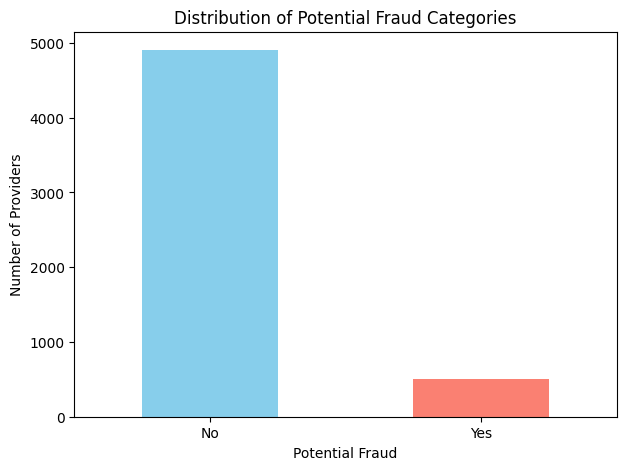

Counts of 'PotentialFraud' categories:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64


In [82]:
# Analyze Target Class Distribution
import matplotlib.pyplot as plt

fraud_counts = labels['PotentialFraud'].value_counts()

plt.figure(figsize=(7, 5))
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Potential Fraud Categories')
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Providers')
plt.xticks(rotation=0)
plt.show()

print("Counts of 'PotentialFraud' categories:")
print(fraud_counts)

**Prepare Claims Data for Provider-Level Aggregation**
First, I'll add a 'ClaimType' column to both `inp` and `outp` DataFrames to distinguish between inpatient and outpatient claims. This is essential before concatenating them.

In [83]:
# Prepare Claims Data for Provider-Level Aggregation
inp['ClaimType'] = 'Inpatient'
outp['ClaimType'] = 'Outpatient'

print("Added 'ClaimType' to inp and outp DataFrames.")

Added 'ClaimType' to inp and outp DataFrames.


Now that the 'ClaimType' column has been added to both `inp` and `outp` DataFrames, the next step is to concatenate them into a single `claims` DataFrame.


In [84]:
claims = pd.concat([inp, outp], ignore_index=True)
print("Concatenated inp and outp DataFrames into 'claims'.")
claims.head()

Concatenated inp and outp DataFrames into 'claims'.


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,Inpatient_LengthOfStay,Claim_Duration,ClaimType,OtherPhysician
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,UNKNOWN,2009-04-12,7866,...,2768,71590,2724,19889,5849,UNKNOWN,6.0,6,Inpatient,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,2009-08-31,6186,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,7092.0,2.0,2,Inpatient,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,UNKNOWN,2009-09-17,29590,...,V1581,32723,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,3.0,3,Inpatient,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,2009-02-14,431,...,V1041,4254,25062,40390,4019,331.0,8.0,8,Inpatient,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,2009-08-13,78321,...,42732,486,5119,29620,20300,3893.0,17.0,17,Inpatient,NaN


To associate each claim with its provider's fraud status, I will merge the `claims` DataFrame with the `labels` DataFrame using the common 'Provider' column.


In [85]:
claims_with_fraud = pd.merge(claims, labels, on='Provider', how='left')
print("Merged 'claims' with 'labels' DataFrame.")
claims_with_fraud.head()

Merged 'claims' with 'labels' DataFrame.


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,Inpatient_LengthOfStay,Claim_Duration,ClaimType,OtherPhysician,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,UNKNOWN,2009-04-12,7866,...,71590,2724,19889,5849,UNKNOWN,6.0,6,Inpatient,NaN,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,2009-08-31,6186,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,7092.0,2.0,2,Inpatient,NaN,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,UNKNOWN,2009-09-17,29590,...,32723,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,3.0,3,Inpatient,NaN,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,2009-02-14,431,...,4254,25062,40390,4019,331.0,8.0,8,Inpatient,NaN,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,2009-08-13,78321,...,486,5119,29620,20300,3893.0,17.0,17,Inpatient,NaN,No


To complete the subtask, I will filter the merged DataFrame to remove claims where the primary diagnosis code ('ClmDiagnosisCode_1') is marked as 'UNKNOWN'.

In [86]:
claims_with_fraud_filtered = claims_with_fraud[claims_with_fraud['ClmDiagnosisCode_1'] != 'UNKNOWN']
print("Filtered out claims with 'UNKNOWN' in 'ClmDiagnosisCode_1'.")
claims_with_fraud_filtered.head()

Filtered out claims with 'UNKNOWN' in 'ClmDiagnosisCode_1'.


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,Inpatient_LengthOfStay,Claim_Duration,ClaimType,OtherPhysician,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,UNKNOWN,2009-04-12,7866,...,71590,2724,19889,5849,UNKNOWN,6.0,6,Inpatient,NaN,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,2009-08-31,6186,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,7092.0,2.0,2,Inpatient,NaN,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,UNKNOWN,2009-09-17,29590,...,32723,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,3.0,3,Inpatient,NaN,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,2009-02-14,431,...,4254,25062,40390,4019,331.0,8.0,8,Inpatient,NaN,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,2009-08-13,78321,...,486,5119,29620,20300,3893.0,17.0,17,Inpatient,NaN,No


**Analyze Provider-Level Claim Volume**
Calculate the total number of claims per provider from the combined claims data. Visualize the distribution of claims per provider using a histogram, potentially differentiating by fraud status.

In [87]:
provider_claim_counts = claims_with_fraud_filtered.groupby(['Provider', 'PotentialFraud']).size().reset_index(name='ClaimCount')
print("Provider claim counts calculated:")
provider_claim_counts.head()

Provider claim counts calculated:


,Provider,PotentialFraud,ClaimCount
0,PRV51001,No,24
1,PRV51003,Yes,132
2,PRV51004,No,143
3,PRV51005,Yes,1149
4,PRV51007,No,72


Now that the provider claim counts have been calculated, I will separate the `provider_claim_counts` DataFrame into two DataFrames, one for fraudulent providers and one for non-fraudulent providers, to prepare for visualization.

In [88]:
fraud_providers_claims = provider_claim_counts[provider_claim_counts['PotentialFraud'] == 'Yes']
non_fraud_providers_claims = provider_claim_counts[provider_claim_counts['PotentialFraud'] == 'No']

print("Separated provider claim counts into fraudulent and non-fraudulent categories.")
print("Fraudulent providers claims head:")
print(fraud_providers_claims.head())
print("Non-fraudulent providers claims head:")
print(non_fraud_providers_claims.head())

Separated provider claim counts into fraudulent and non-fraudulent categories.
Fraudulent providers claims head:
    Provider PotentialFraud  ClaimCount
1   PRV51003            Yes         132
3   PRV51005            Yes        1149
13  PRV51021            Yes         253
25  PRV51037            Yes         447
37  PRV51052            Yes          46
Non-fraudulent providers claims head:
   Provider PotentialFraud  ClaimCount
0  PRV51001             No          24
2  PRV51004             No         143
4  PRV51007             No          72
5  PRV51008             No          42
6  PRV51011             No          53


To visualize the distribution of claims per provider, I will create two separate histograms for 'ClaimCount' — one for non-fraudulent providers and one for fraudulent providers, as specified in the instructions. This will allow for a direct comparison of claim volume patterns.

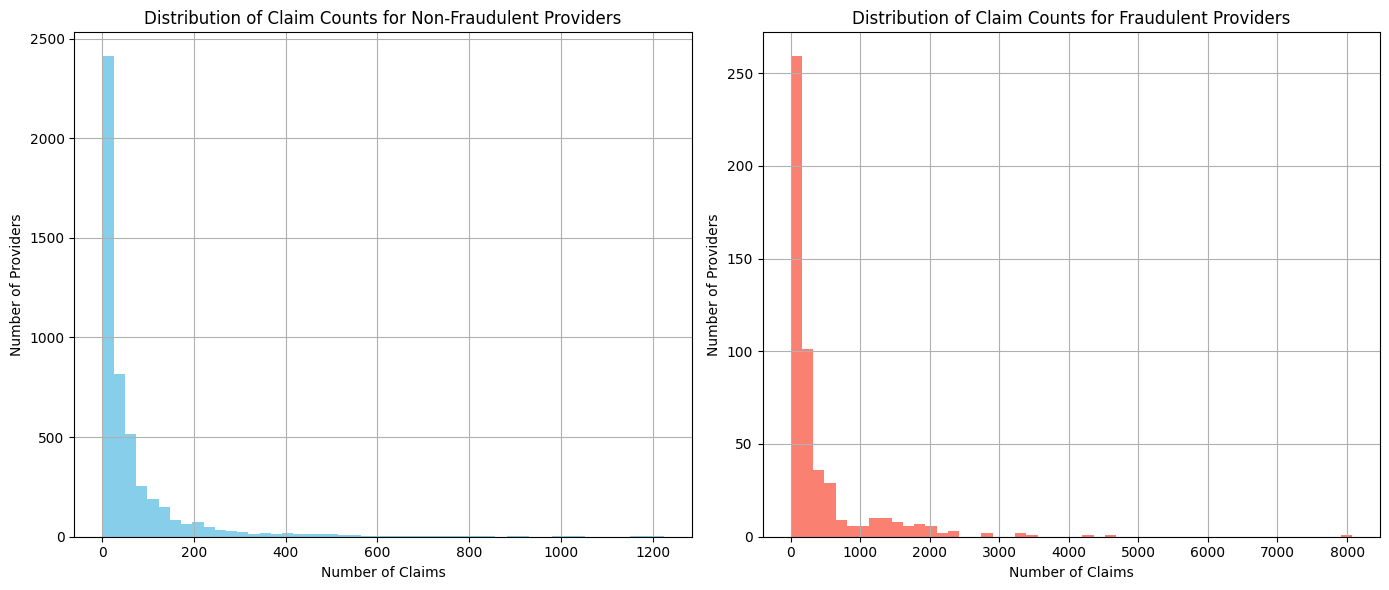

Generated histograms for claim counts of fraudulent and non-fraudulent providers.


In [89]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
non_fraud_providers_claims['ClaimCount'].hist(bins=50, color='skyblue')
plt.title('Distribution of Claim Counts for Non-Fraudulent Providers')
plt.xlabel('Number of Claims')
plt.ylabel('Number of Providers')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
fraud_providers_claims['ClaimCount'].hist(bins=50, color='salmon')
plt.title('Distribution of Claim Counts for Fraudulent Providers')
plt.xlabel('Number of Claims')
plt.ylabel('Number of Providers')

plt.tight_layout()
plt.show()

print("Generated histograms for claim counts of fraudulent and non-fraudulent providers.")

**Analyze Monetary Patterns** Calculate the total reimbursement amount, mean claim amount, and maximum claim amount per provider. Additionally, calculate the ratio of inpatient to outpatient reimbursements for each provider. Visualize these monetary patterns, differentiating between fraudulent and non-fraudulent providers using appropriate plots (e.g., boxplots or histograms).

In [90]:
provider_monetary_patterns = claims_with_fraud_filtered.groupby(['Provider', 'PotentialFraud'])['InscClaimAmtReimbursed'].agg(
    total_reimbursed='sum',
    mean_claim_amount='mean',
    max_claim_amount='max'
).reset_index()

print("Aggregated monetary patterns per provider:")
print(provider_monetary_patterns.head())

Aggregated monetary patterns per provider:
   Provider PotentialFraud  total_reimbursed  mean_claim_amount  \
0  PRV51001             No            104340        4347.500000   
1  PRV51003            Yes            605670        4588.409091   
2  PRV51004             No             51830         362.447552   
3  PRV51005            Yes            278960         242.785030   
4  PRV51007             No             33710         468.194444   

   max_claim_amount  
0             42000  
1             57000  
2              3300  
3              4080  
4             10000  


In [91]:
# To calculate the ratio of inpatient to outpatient reimbursements, I need to first aggregate the reimbursement amounts separately for inpatient and outpatient claims for each provider.
# Then I will calculate the ratio.
inpatient_reimbursement = claims_with_fraud_filtered[claims_with_fraud_filtered['ClaimType'] == 'Inpatient'].groupby(['Provider', 'PotentialFraud'])['InscClaimAmtReimbursed'].sum().reset_index(name='InpatientReimbursement')
outpatient_reimbursement = claims_with_fraud_filtered[claims_with_fraud_filtered['ClaimType'] == 'Outpatient'].groupby(['Provider', 'PotentialFraud'])['InscClaimAmtReimbursed'].sum().reset_index(name='OutpatientReimbursement')

provider_reimbursement_type = pd.merge(inpatient_reimbursement, outpatient_reimbursement, on=['Provider', 'PotentialFraud'], how='outer').fillna(0)

# Calculate the ratio, handling division by zero
provider_reimbursement_type['Inp_Outp_Reimbursement_Ratio'] = provider_reimbursement_type.apply(
    lambda row: row['InpatientReimbursement'] / row['OutpatientReimbursement'] if row['OutpatientReimbursement'] != 0 else (row['InpatientReimbursement'] / 1 if row['InpatientReimbursement'] != 0 else 0),
    axis=1
)

provider_monetary_patterns = pd.merge(provider_monetary_patterns, provider_reimbursement_type, on=['Provider', 'PotentialFraud'], how='left')

print("Aggregated monetary patterns with inpatient/outpatient ratio:")
print(provider_monetary_patterns.head())

Aggregated monetary patterns with inpatient/outpatient ratio:
   Provider PotentialFraud  total_reimbursed  mean_claim_amount  \
0  PRV51001             No            104340        4347.500000   
1  PRV51003            Yes            605670        4588.409091   
2  PRV51004             No             51830         362.447552   
3  PRV51005            Yes            278960         242.785030   
4  PRV51007             No             33710         468.194444   

   max_claim_amount  InpatientReimbursement  OutpatientReimbursement  \
0             42000                 97000.0                   7340.0   
1             57000                573000.0                  32670.0   
2              3300                     0.0                  51830.0   
3              4080                     0.0                 278960.0   
4             10000                 19000.0                  14710.0   

   Inp_Outp_Reimbursement_Ratio  
0                     13.215259  
1                     17.539027  


To visualize the monetary patterns and differentiate between fraudulent and non-fraudulent providers, I will create boxplots for 'total_reimbursed', 'mean_claim_amount', 'max_claim_amount', and 'Inp_Outp_Reimbursement_Ratio', grouped by 'PotentialFraud'.

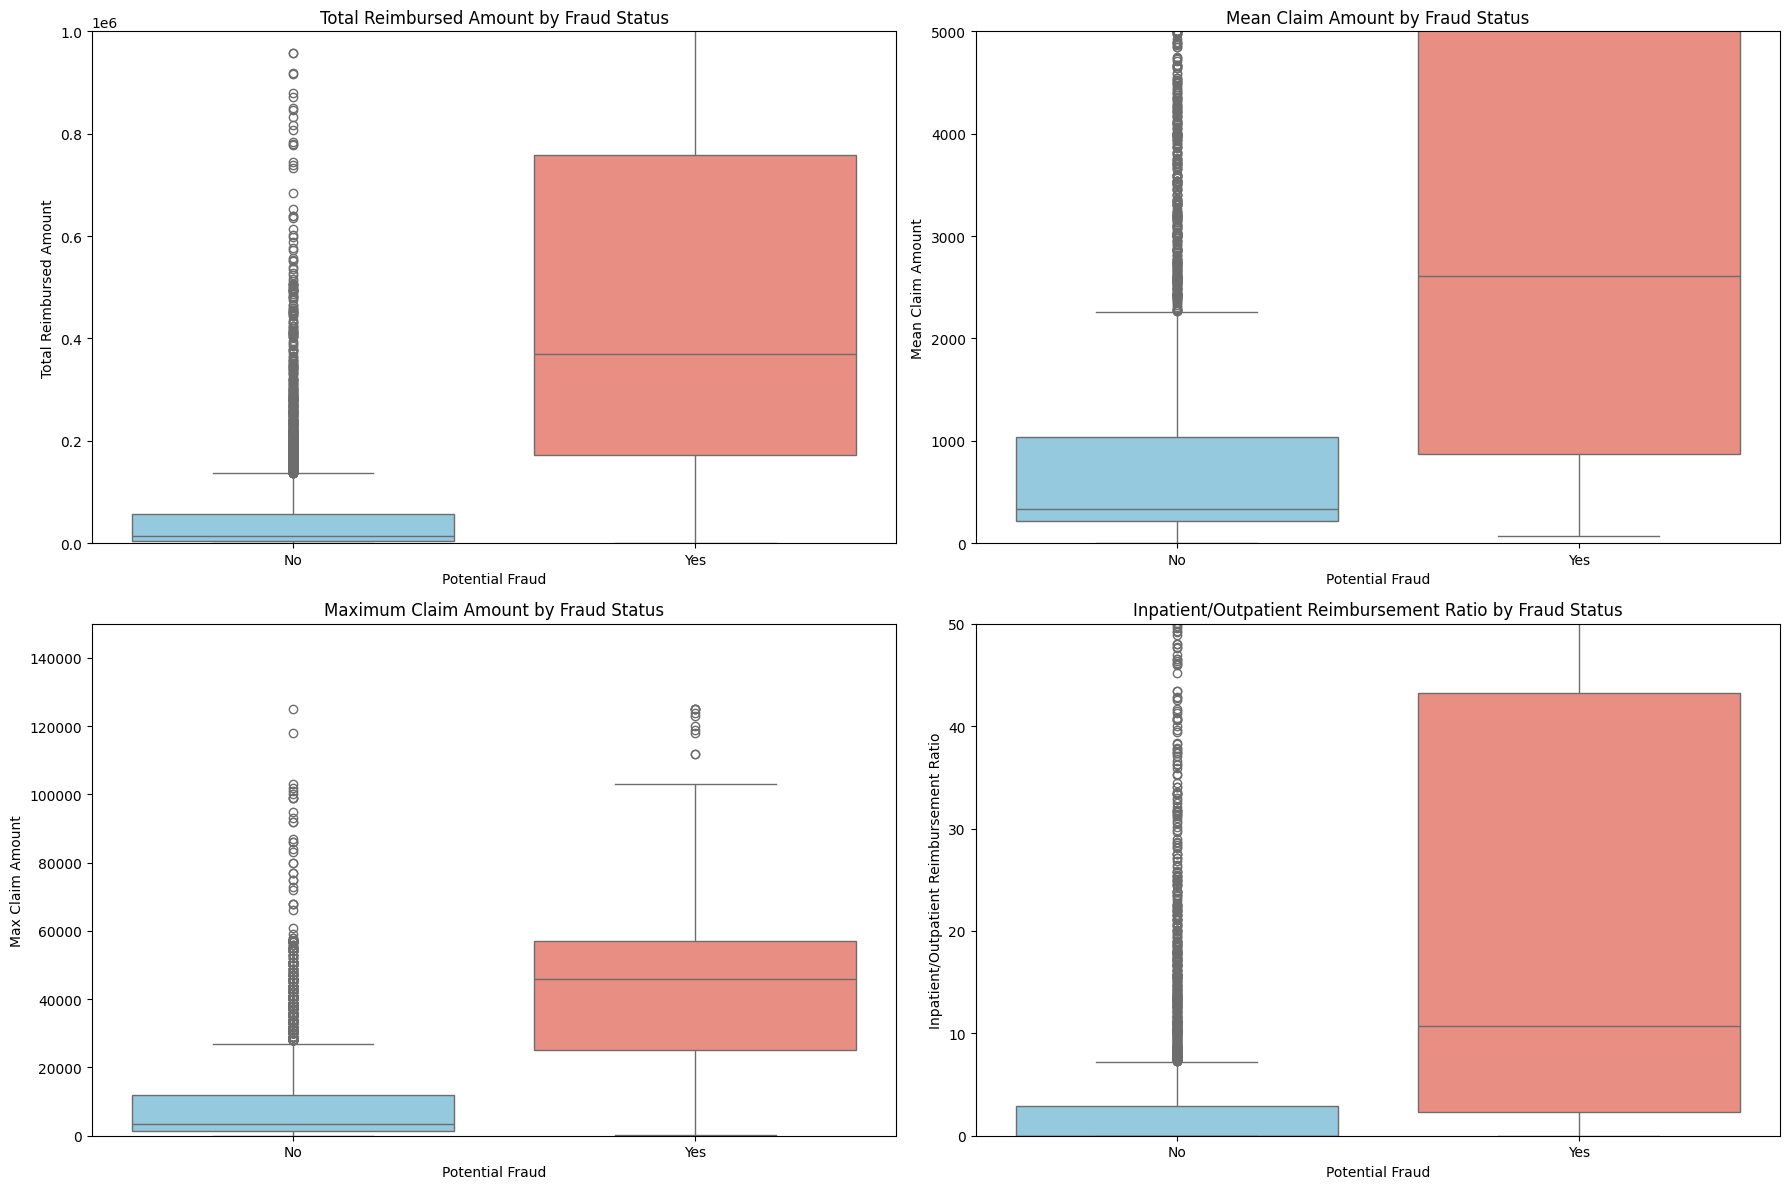

Generated boxplots for total, mean, max reimbursement and inpatient/outpatient ratio, differentiated by fraud status.


In [92]:
import seaborn as sns

plt.figure(figsize=(18, 12))

# Boxplot for Total Reimbursed Amount
plt.subplot(2, 2, 1)
sns.boxplot(x='PotentialFraud', y='total_reimbursed', data=provider_monetary_patterns, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Total Reimbursed Amount by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Total Reimbursed Amount')
plt.ylim(0, 1000000) # Limiting y-axis for better visualization of main distribution

# Boxplot for Mean Claim Amount
plt.subplot(2, 2, 2)
sns.boxplot(x='PotentialFraud', y='mean_claim_amount', data=provider_monetary_patterns, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Mean Claim Amount by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Mean Claim Amount')
plt.ylim(0, 5000) # Limiting y-axis for better visualization of main distribution

# Boxplot for Max Claim Amount
plt.subplot(2, 2, 3)
sns.boxplot(x='PotentialFraud', y='max_claim_amount', data=provider_monetary_patterns, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Maximum Claim Amount by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Max Claim Amount')
plt.ylim(0, 150000) # Limiting y-axis for better visualization of main distribution

# Boxplot for Inpatient/Outpatient Reimbursement Ratio
plt.subplot(2, 2, 4)
sns.boxplot(x='PotentialFraud', y='Inp_Outp_Reimbursement_Ratio', data=provider_monetary_patterns, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Inpatient/Outpatient Reimbursement Ratio by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Inpatient/Outpatient Reimbursement Ratio')
plt.ylim(0, 50) # Limiting y-axis for better visualization of main distribution

plt.tight_layout()
plt.show()

print("Generated boxplots for total, mean, max reimbursement and inpatient/outpatient ratio, differentiated by fraud status.")

In [93]:
claims_with_fraud_filtered['ClaimStartDt'] = pd.to_datetime(claims_with_fraud_filtered['ClaimStartDt'])
print("'ClaimStartDt' column converted to datetime type.")

'ClaimStartDt' column converted to datetime type.


/tmp/ipython-input-1837636300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_with_fraud_filtered['ClaimStartDt'] = pd.to_datetime(claims_with_fraud_filtered['ClaimStartDt'])


To prepare data for patient mix analysis, I'll first merge `claims_with_fraud_filtered` with the `bene` DataFrame on `BeneID`. Then, I'll calculate the 'Age' of each beneficiary at the time of their claim using their 'DOB' and the 'ClaimStartDt' of the claim. Finally, I'll create a new column, 'Is_Deceased', to indicate whether a beneficiary was deceased at the time of the claim, using the 'DOD' information. This will allow us to assess patient demographics and chronic conditions in relation to fraud status.

In [94]:
# 1-merging two dataframes
# 2-calculating a new 'Age' column based on dates
# 3-creating a 'Is_Deceased' boolean column
claims_bene_merged = pd.merge(claims_with_fraud_filtered, bene, on='BeneID', how='left')

# Calculate Age
claims_bene_merged['Age'] = ((claims_bene_merged['ClaimStartDt'] - claims_bene_merged['DOB']).dt.days / 365.25).astype(int)

# Identify deceased beneficiaries
claims_bene_merged['Is_Deceased'] = (~claims_bene_merged['DOD'].isnull()) & (claims_bene_merged['ClaimStartDt'] > claims_bene_merged['DOD'])

print("Merged 'claims_with_fraud_filtered' and 'bene' DataFrames, calculated 'Age', and identified 'Is_Deceased'.")
claims_bene_merged.head()

Merged 'claims_with_fraud_filtered' and 'bene' DataFrames, calculated 'Age', and identified 'Is_Deceased'.


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Is_Deceased
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,UNKNOWN,2009-04-12,7866,...,1,2,1,1,36000,3204,60,70,66,False
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,2009-08-31,6186,...,1,2,1,1,36000,3204,60,70,66,False
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,UNKNOWN,2009-09-17,29590,...,1,2,1,1,36000,3204,60,70,66,False
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,2009-02-14,431,...,2,2,1,1,5000,1068,250,320,94,False
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,2009-08-13,78321,...,1,2,2,2,21260,2136,120,100,71,False


In [95]:
# group the merged claims and beneficiary data by provider and fraud status
# calculate the average age
# calculate percentage of deceased beneficiaries
# calculate mean chronic condition rates for each group as instructed
chronic_cond_cols = [col for col in claims_bene_merged.columns if 'ChronicCond_' in col]

provider_patient_mix = claims_bene_merged.groupby(['Provider', 'PotentialFraud']).agg(
    AvgAge=('Age', 'mean'),
    PercDeceased=('Is_Deceased', lambda x: (x.sum() / len(x)) * 100) # Percentage of deceased
).reset_index()

# Calculate average rates for each chronic condition
for col in chronic_cond_cols:
    chronic_agg = claims_bene_merged.groupby(['Provider', 'PotentialFraud'])[col].mean().reset_index(name=f'Avg_{col}')
    provider_patient_mix = pd.merge(provider_patient_mix, chronic_agg, on=['Provider', 'PotentialFraud'], how='left')

print("Calculated patient mix features per provider:")
provider_patient_mix.head()

Calculated patient mix features per provider:


,Provider,PotentialFraud,AvgAge,PercDeceased,Avg_ChronicCond_Alzheimer,Avg_ChronicCond_Heartfailure,Avg_ChronicCond_KidneyDisease,Avg_ChronicCond_Cancer,Avg_ChronicCond_ObstrPulmonary,Avg_ChronicCond_Depression,Avg_ChronicCond_Diabetes,Avg_ChronicCond_IschemicHeart,Avg_ChronicCond_Osteoporasis,Avg_ChronicCond_rheumatoidarthritis,Avg_ChronicCond_stroke
0,PRV51001,No,78.750000,0.0,1.416667,1.250000,1.333333,1.791667,1.625000,1.625000,1.166667,1.083333,1.750000,1.666667,1.750000
1,PRV51003,Yes,69.083333,0.0,1.575758,1.393939,1.515152,1.924242,1.689394,1.590909,1.242424,1.151515,1.750000,1.712121,1.909091
2,PRV51004,No,71.307692,0.0,1.573427,1.405594,1.657343,1.895105,1.720280,1.573427,1.293706,1.272727,1.664336,1.692308,1.881119
3,PRV51005,Yes,69.519582,0.0,1.633594,1.416014,1.563098,1.857267,1.744996,1.584856,1.312446,1.231506,1.704961,1.711923,1.893821
4,PRV51007,No,68.305556,0.0,1.638889,1.444444,1.694444,1.833333,1.777778,1.597222,1.319444,1.291667,1.708333,1.694444,1.833333


In [96]:
num_chronic_features = len(chronic_cond_cols)
rows = (num_chronic_features + 2) // 3 # Roughly 3 plots per row
plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(chronic_cond_cols):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x='PotentialFraud', y=f'Avg_{col}', data=provider_patient_mix, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
    plt.title(f'Average {col.replace("ChronicCond_", "")} Rate by Fraud Status')
    plt.xlabel('Potential Fraud')
    plt.ylabel(f'Average {col.replace("ChronicCond_", "")} Rate')

plt.tight_layout()
plt.show()

print("Generated boxplots for average chronic condition rates, differentiated by fraud status.")

**Analyze Procedure and Diagnosis Patterns**

For each provider, extract all diagnosis codes (ClmDiagnosisCode_1 to ClmDiagnosisCode_9) and procedure codes (ClmProcedureCode_1) from claims_with_fraud_filtered. Count the total number of unique diagnosis and procedure codes per provider. Also, identify the most frequent diagnosis codes for fraudulent and non-fraudulent providers separately.


In [97]:
# 1.extract all diagnosis codes from the specified columns
# 2.count their occurrences
# 3.store them in a list, excluding 'UNKNOWN' values
all_diagnosis_codes = []

diagnosis_cols = [col for col in claims_with_fraud_filtered.columns if 'ClmDiagnosisCode_' in col and col != 'ClmDiagnosisCode_10']

for col in diagnosis_cols:
    # Filter out 'UNKNOWN' diagnosis codes before counting
    temp_df = claims_with_fraud_filtered[claims_with_fraud_filtered[col] != 'UNKNOWN']

    # Group by Provider and PotentialFraud and count each unique diagnosis code
    diagnosis_counts = temp_df.groupby(['Provider', 'PotentialFraud', col]).size().reset_index(name='Count')
    diagnosis_counts.rename(columns={col: 'DiagnosisCode'}, inplace=True)
    all_diagnosis_codes.append(diagnosis_counts)

print("Extracted and counted diagnosis codes from all ClmDiagnosisCode columns.")

Extracted and counted diagnosis codes from all ClmDiagnosisCode columns.


In [98]:
# After extracting diagnosis codes from individual columns
# 1.combine them into a single DataFrame
# 2.calculate unique diagnosis code counts per provider
# 3.identify the most frequent diagnosis codes for fraudulent and non-fraudulent providers separately

all_diagnosis_counts_df = pd.concat(all_diagnosis_codes, ignore_index=True)

unique_diagnosis_counts = all_diagnosis_counts_df.groupby(['Provider', 'PotentialFraud'])['DiagnosisCode'].nunique().reset_index(name='UniqueDiagnosisCodeCount')

# Identify the most frequent diagnosis codes for fraudulent providers
fraud_diagnosis_counts = all_diagnosis_counts_df[all_diagnosis_counts_df['PotentialFraud'] == 'Yes']
top_fraud_diagnosis = fraud_diagnosis_counts.groupby('DiagnosisCode')['Count'].sum().nlargest(10).reset_index()

# Identify the most frequent diagnosis codes for non-fraudulent providers
non_fraud_diagnosis_counts = all_diagnosis_counts_df[all_diagnosis_counts_df['PotentialFraud'] == 'No']
top_non_fraud_diagnosis = non_fraud_diagnosis_counts.groupby('DiagnosisCode')['Count'].sum().nlargest(10).reset_index()

print("Concatenated diagnosis code counts, calculated unique counts per provider, and identified top 10 frequent codes for fraudulent and non-fraudulent providers.")
print("\nTop 10 Fraudulent Diagnosis Codes:")
print(top_fraud_diagnosis)
print("\nTop 10 Non-Fraudulent Diagnosis Codes:")
print(top_non_fraud_diagnosis)

Concatenated diagnosis code counts, calculated unique counts per provider, and identified top 10 frequent codes for fraudulent and non-fraudulent providers.

Top 10 Fraudulent Diagnosis Codes:
  DiagnosisCode  Count
0          4019  27309
1          2724  12962
2         25000  12757
3          4011   7965
4         42731   7790
5         V5869   7483
6         V5861   6770
7          4280   6289
8          2449   6270
9          2720   6081

Top 10 Non-Fraudulent Diagnosis Codes:
  DiagnosisCode  Count
0          4019  39627
1         25000  18233
2          2724  18049
3          4011  13852
4         V5869  12961
5         V5861  10907
6         42731   9829
7          2720   9292
8          2449   8560
9          4280   7036


In [99]:
# The next step is
# 1.group claims_with_fraud_filtered by 'Provider' and 'PotentialFraud'
# 2.count the unique non-'UNKNOWN' values in 'ClmProcedureCode_1' to obtain UniqueProcedureCodeCount
# 3.merge with the unique diagnosis counts

unique_procedure_counts = claims_with_fraud_filtered[claims_with_fraud_filtered['ClmProcedureCode_1'] != 'UNKNOWN'].groupby(['Provider', 'PotentialFraud'])['ClmProcedureCode_1'].nunique().reset_index(name='UniqueProcedureCodeCount')

provider_diagnosis_procedure_patterns = pd.merge(unique_diagnosis_counts, unique_procedure_counts, on=['Provider', 'PotentialFraud'], how='left').fillna(0)

print("Calculated unique procedure code counts and merged with unique diagnosis code counts:")
print(provider_diagnosis_procedure_patterns.head())

Calculated unique procedure code counts and merged with unique diagnosis code counts:
   Provider PotentialFraud  UniqueDiagnosisCodeCount  UniqueProcedureCodeCount
0  PRV51001             No                        67                       2.0
1  PRV51003            Yes                       358                      32.0
2  PRV51004             No                       244                       0.0
3  PRV51005            Yes                      1200                       0.0
4  PRV51007             No                       142                       1.0


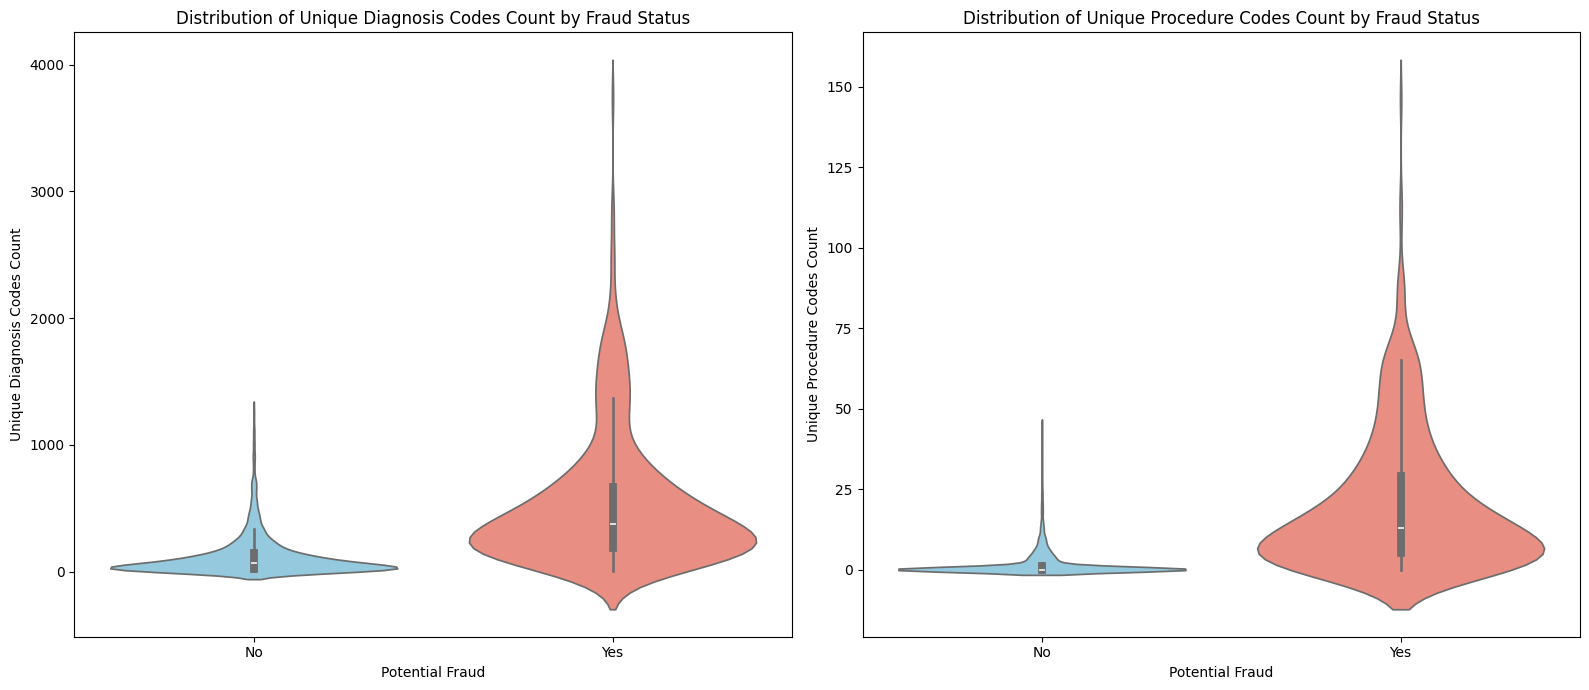

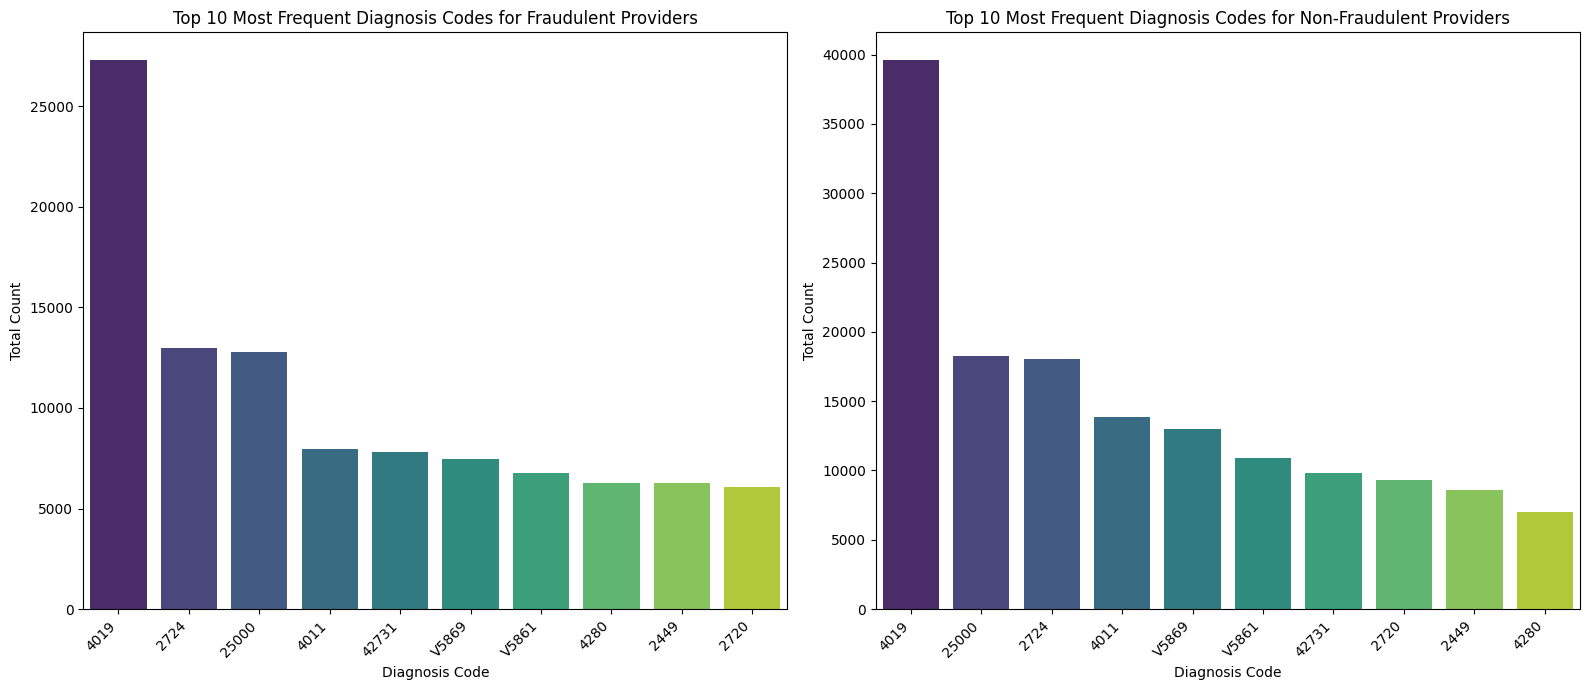

Generated visualizations for diagnosis and procedure patterns.


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))

# Violin plot for Unique Diagnosis Code Count
plt.subplot(1, 2, 1)
sns.violinplot(x='PotentialFraud', y='UniqueDiagnosisCodeCount', data=provider_diagnosis_procedure_patterns, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Distribution of Unique Diagnosis Codes Count by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Unique Diagnosis Codes Count')

# Violin plot for Unique Procedure Code Count
plt.subplot(1, 2, 2)
sns.violinplot(x='PotentialFraud', y='UniqueProcedureCodeCount', data=provider_diagnosis_procedure_patterns, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Distribution of Unique Procedure Codes Count by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Unique Procedure Codes Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 7))

# Bar plot for Top 10 Most Frequent Diagnosis Codes for Fraudulent Providers
plt.subplot(1, 2, 1)
sns.barplot(x='DiagnosisCode', y='Count', data=top_fraud_diagnosis, hue='DiagnosisCode', palette='viridis', legend=False)
plt.title('Top 10 Most Frequent Diagnosis Codes for Fraudulent Providers')
plt.xlabel('Diagnosis Code')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')

# Bar plot for Top 10 Most Frequent Diagnosis Codes for Non-Fraudulent Providers
plt.subplot(1, 2, 2)
sns.barplot(x='DiagnosisCode', y='Count', data=top_non_fraud_diagnosis, hue='DiagnosisCode', palette='viridis', legend=False)
plt.title('Top 10 Most Frequent Diagnosis Codes for Non-Fraudulent Providers')
plt.xlabel('Diagnosis Code')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Generated visualizations for diagnosis and procedure patterns.")

**Analyze Temporal Behavior**

Group the claims_with_fraud_filtered DataFrame by **'Provider'**, **'PotentialFraud'**, and the month of **'ClaimStartDt'**. Calculate the monthly claim counts and total reimbursement amounts for each group.

In [101]:
# 1.extract the month from the 'ClaimStartDt' column
# 2.group the data by 'Provider', 'PotentialFraud', and the new 'ClaimMonth' to calculate monthly claim counts and total reimbursement amounts as instructed.
claims_with_fraud_filtered['ClaimMonth'] = claims_with_fraud_filtered['ClaimStartDt'].dt.to_period('M').dt.to_timestamp()

temporal_patterns = claims_with_fraud_filtered.groupby(['Provider', 'PotentialFraud', 'ClaimMonth']).agg(
    ClaimCount=('ClaimID', 'size'),
    TotalReimbursement=('InscClaimAmtReimbursed', 'sum')
).reset_index()

print("Calculated monthly claim counts and total reimbursement amounts per provider and fraud status:")
print(temporal_patterns.head())

/tmp/ipython-input-849296984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims_with_fraud_filtered['ClaimMonth'] = claims_with_fraud_filtered['ClaimStartDt'].dt.to_period('M').dt.to_timestamp()


Calculated monthly claim counts and total reimbursement amounts per provider and fraud status:
   Provider PotentialFraud ClaimMonth  ClaimCount  TotalReimbursement
0  PRV51001             No 2009-01-01           2                1010
1  PRV51001             No 2009-02-01           4                8100
2  PRV51001             No 2009-03-01           3                 650
3  PRV51001             No 2009-04-01           2                1600
4  PRV51001             No 2009-05-01           5               55000


In [102]:
# we will aggregate the temporal_patterns DataFrame to create plot_data_claim_count and plot_data_reimbursement by summing 'ClaimCount' and 'TotalReimbursement' respectively, grouped by 'ClaimMonth' and 'PotentialFraud'.
plot_data_claim_count = temporal_patterns.groupby(['ClaimMonth', 'PotentialFraud'])['ClaimCount'].sum().reset_index()
plot_data_reimbursement = temporal_patterns.groupby(['ClaimMonth', 'PotentialFraud'])['TotalReimbursement'].sum().reset_index()

print("Aggregated monthly claim counts and total reimbursement amounts for plotting.")
print("Monthly claim counts head:")
print(plot_data_claim_count.head())
print("Monthly reimbursement amounts head:")
print(plot_data_reimbursement.head())

Aggregated monthly claim counts and total reimbursement amounts for plotting.
Monthly claim counts head:
  ClaimMonth PotentialFraud  ClaimCount
0 2008-11-01             No           2
1 2008-11-01            Yes           4
2 2008-12-01             No        1579
3 2008-12-01            Yes        1109
4 2009-01-01             No       29903
Monthly reimbursement amounts head:
  ClaimMonth PotentialFraud  TotalReimbursement
0 2008-11-01             No               66000
1 2008-11-01            Yes               76000
2 2008-12-01             No             4488800
3 2008-12-01            Yes             6672900
4 2009-01-01             No            22700260


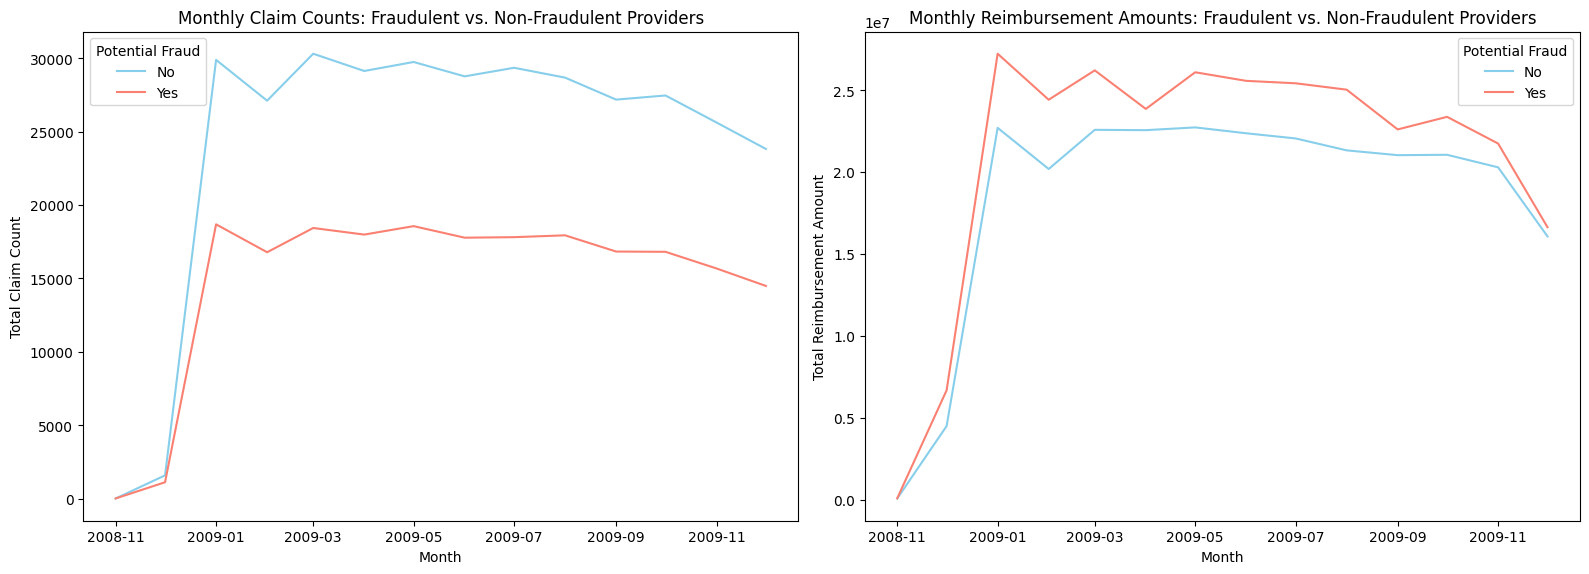

Generated time series plots for monthly claim counts and reimbursement amounts.


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Plot monthly claim counts
plt.subplot(1, 2, 1)
sns.lineplot(x='ClaimMonth', y='ClaimCount', hue='PotentialFraud', data=plot_data_claim_count, palette={'Yes': 'salmon', 'No': 'skyblue'})
plt.title('Monthly Claim Counts: Fraudulent vs. Non-Fraudulent Providers')
plt.xlabel('Month')
plt.ylabel('Total Claim Count')
plt.legend(title='Potential Fraud')

# Plot monthly total reimbursement amounts
plt.subplot(1, 2, 2)
sns.lineplot(x='ClaimMonth', y='TotalReimbursement', hue='PotentialFraud', data=plot_data_reimbursement, palette={'Yes': 'salmon', 'No': 'skyblue'})
plt.title('Monthly Reimbursement Amounts: Fraudulent vs. Non-Fraudulent Providers')
plt.xlabel('Month')
plt.ylabel('Total Reimbursement Amount')
plt.legend(title='Potential Fraud')

plt.tight_layout()
plt.show()

print("Generated time series plots for monthly claim counts and reimbursement amounts.")

**Analyze Physician Networks**

For each provider, count the number of unique 'AttendingPhysician', 'OperatingPhysician', and 'OtherPhysician' associated with their claims in the `claims_with_fraud_filtered` DataFrame. This will help identify providers using an unusually high or low number of physicians.

In [104]:
# 1.calculate the number of unique 'AttendingPhysician' values for each provider
# 2.grouped by their fraud status, excluding 'UNKNOWN' entries
unique_attending_physicians = claims_with_fraud_filtered[claims_with_fraud_filtered['AttendingPhysician'] != 'UNKNOWN'].groupby(['Provider', 'PotentialFraud'])['AttendingPhysician'].nunique().reset_index(name='UniqueAttendingPhysicians')
print("Calculated unique attending physicians per provider:")
print(unique_attending_physicians.head())

# calculate the number of unique 'OperatingPhysician'
unique_operating_physicians = claims_with_fraud_filtered[claims_with_fraud_filtered['OperatingPhysician'] != 'UNKNOWN'].groupby(['Provider', 'PotentialFraud'])['OperatingPhysician'].nunique().reset_index(name='UniqueOperatingPhysicians')

provider_physician_counts = pd.merge(unique_attending_physicians, unique_operating_physicians, on=['Provider', 'PotentialFraud'], how='left').fillna(0)

print("Calculated unique operating physicians and merged with attending physicians:")
print(provider_physician_counts.head())

# calculate the number of unique 'OtherPhysician'
unique_other_physicians = claims_with_fraud_filtered[claims_with_fraud_filtered['OtherPhysician'] != 'UNKNOWN'].groupby(['Provider', 'PotentialFraud'])['OtherPhysician'].nunique().reset_index(name='UniqueOtherPhysicians')

provider_physician_counts = pd.merge(provider_physician_counts, unique_other_physicians, on=['Provider', 'PotentialFraud'], how='left').fillna(0)

print("Calculated unique other physicians and merged with previous physician counts:")
print(provider_physician_counts.head())

Calculated unique attending physicians per provider:
   Provider PotentialFraud  UniqueAttendingPhysicians
0  PRV51001             No                         13
1  PRV51003            Yes                         44
2  PRV51004             No                         37
3  PRV51005            Yes                          6
4  PRV51007             No                         10
Calculated unique operating physicians and merged with attending physicians:
   Provider PotentialFraud  UniqueAttendingPhysicians  \
0  PRV51001             No                         13   
1  PRV51003            Yes                         44   
2  PRV51004             No                         37   
3  PRV51005            Yes                          6   
4  PRV51007             No                         10   

   UniqueOperatingPhysicians  
0                        2.0  
1                        2.0  
2                        0.0  
3                        0.0  
4                        1.0  
Calculated unique

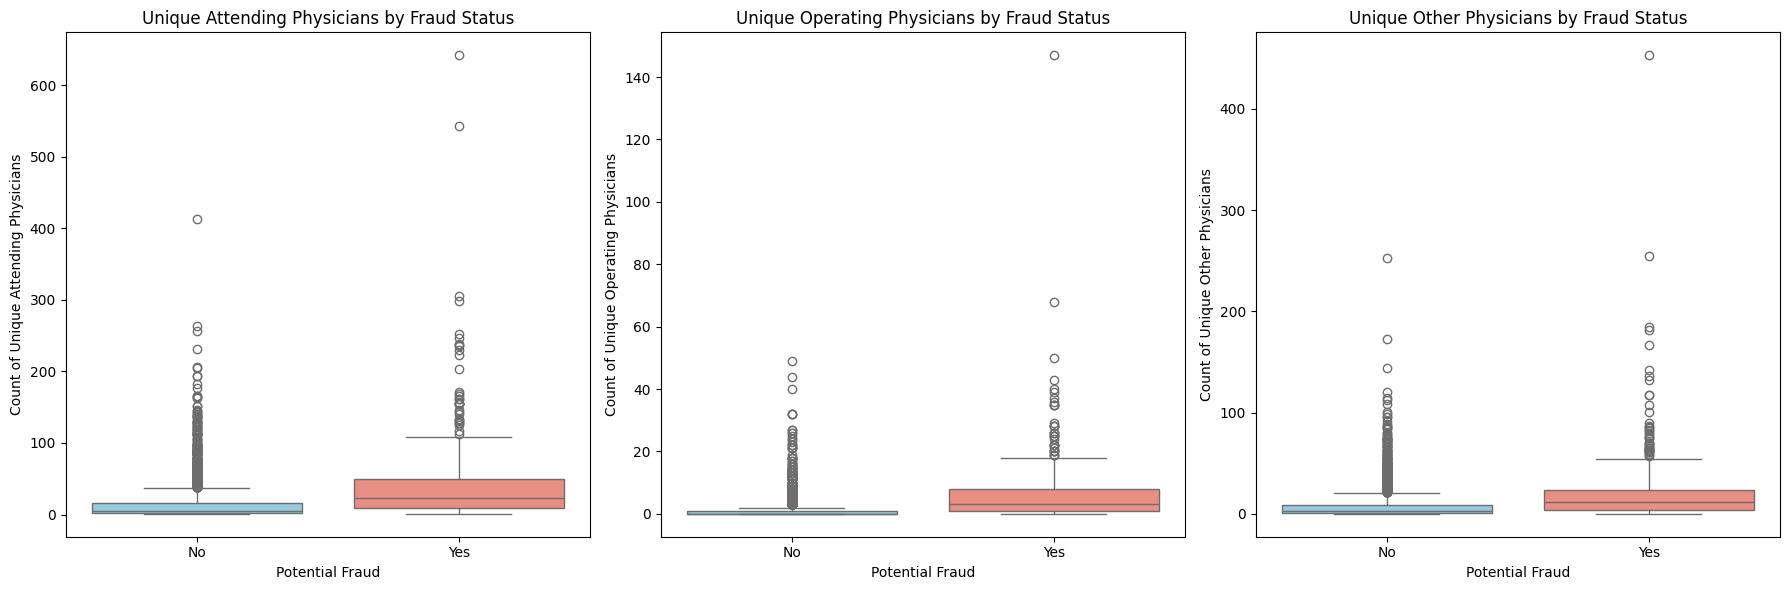

Generated boxplots for unique physician counts, differentiated by fraud status.


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Boxplot for Unique Attending Physicians
plt.subplot(1, 3, 1)
sns.boxplot(x='PotentialFraud', y='UniqueAttendingPhysicians', data=provider_physician_counts, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Unique Attending Physicians by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of Unique Attending Physicians')

# Boxplot for Unique Operating Physicians
plt.subplot(1, 3, 2)
sns.boxplot(x='PotentialFraud', y='UniqueOperatingPhysicians', data=provider_physician_counts, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Unique Operating Physicians by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of Unique Operating Physicians')

# Boxplot for Unique Other Physicians
plt.subplot(1, 3, 3)
sns.boxplot(x='PotentialFraud', y='UniqueOtherPhysicians', data=provider_physician_counts, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Unique Other Physicians by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of Unique Other Physicians')

plt.tight_layout()
plt.show()

print("Generated boxplots for unique physician counts, differentiated by fraud status.")

**Analyze Geographic Patterns**

From the merged claims and beneficiary data, for each **provider**, we will determine the number of unique **`State`** and **`County`** values where their beneficiaries reside. This indicates the geographic reach of each provider.

In [106]:
# 1.group the claims_bene_merged DataFrame by 'Provider' and 'PotentialFraud'
# 2.calculate the number of unique 'State' and 'County' values for each provider
provider_geographic_counts = claims_bene_merged.groupby(['Provider', 'PotentialFraud']).agg(
    UniqueStates=('State', 'nunique'),
    UniqueCounties=('County', 'nunique')
).reset_index()

print("Calculated unique states and counties per provider:")
print(provider_geographic_counts.head())

Calculated unique states and counties per provider:
   Provider PotentialFraud  UniqueStates  UniqueCounties
0  PRV51001             No             1               7
1  PRV51003            Yes             3              23
2  PRV51004             No             9              27
3  PRV51005            Yes             4              26
4  PRV51007             No             2               6


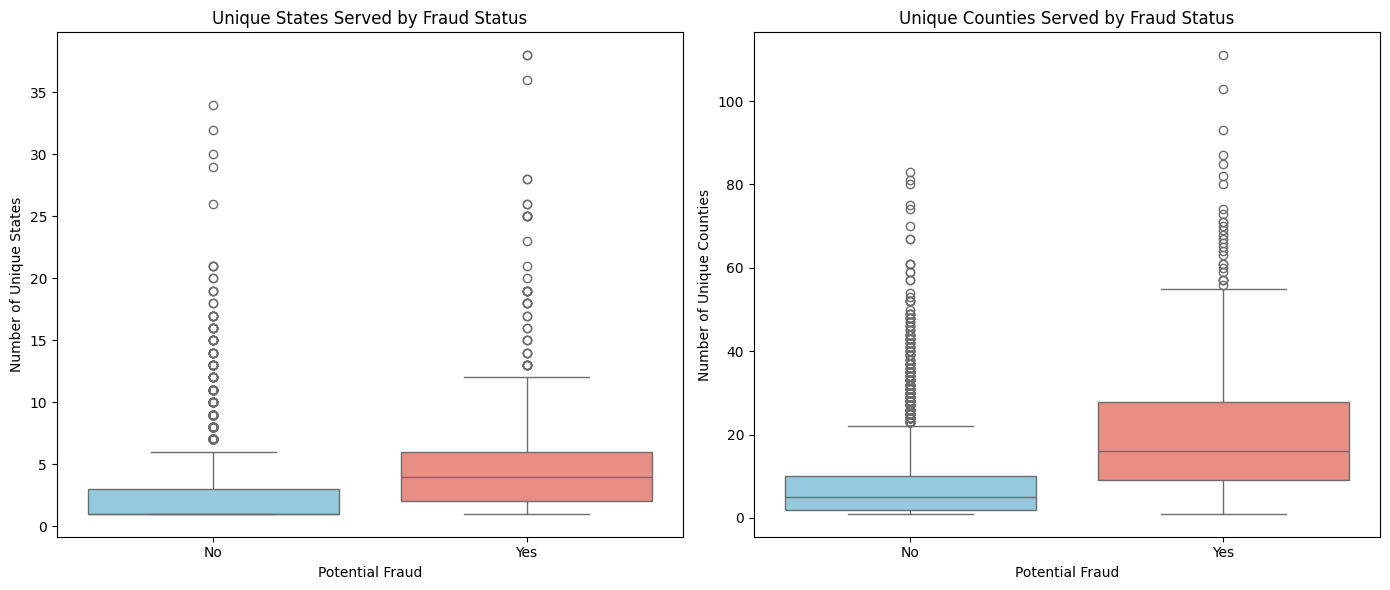

Generated boxplots for unique states and counties, differentiated by fraud status.


In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Boxplot for Unique States
plt.subplot(1, 2, 1)
sns.boxplot(x='PotentialFraud', y='UniqueStates', data=provider_geographic_counts, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Unique States Served by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Unique States')

# Boxplot for Unique Counties
plt.subplot(1, 2, 2)
sns.boxplot(x='PotentialFraud', y='UniqueCounties', data=provider_geographic_counts, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Unique Counties Served by Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Unique Counties')

plt.tight_layout()
plt.show()

print("Generated boxplots for unique states and counties, differentiated by fraud status.")

**Visualize Patient Race and Gender Distribution**

Created 'Gender_Label' and 'Race_Label' columns.


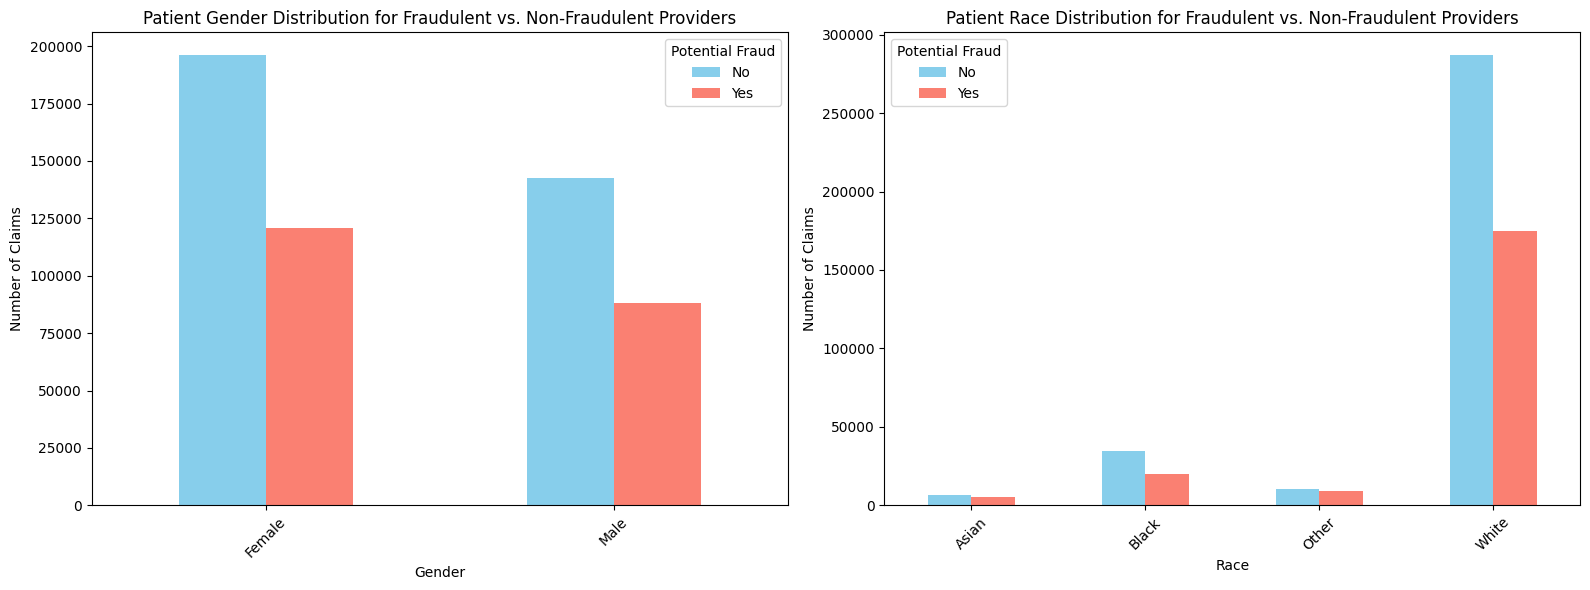

Generated bar charts for patient race and gender distribution, differentiating by fraud status.


In [108]:
gender_map = {1: 'Male', 2: 'Female'}
race_map = {1: 'White', 2: 'Black', 3: 'Other', 5: 'Asian'}

claims_bene_merged['Gender_Label'] = claims_bene_merged['Gender'].map(gender_map)
claims_bene_merged['Race_Label'] = claims_bene_merged['Race'].map(race_map)

print("Created 'Gender_Label' and 'Race_Label' columns.")
claims_bene_merged[['Gender', 'Gender_Label', 'Race', 'Race_Label']].head()

import matplotlib.pyplot as plt
import pandas as pd

# Group by Gender_Label and PotentialFraud to get counts
gender_distribution = claims_bene_merged.groupby(['Gender_Label', 'PotentialFraud']).size().unstack(fill_value=0)

# Group by Race_Label and PotentialFraud to get counts
race_distribution = claims_bene_merged.groupby(['Race_Label', 'PotentialFraud']).size().unstack(fill_value=0)

# Plotting the distributions
plt.figure(figsize=(16, 6))

# Gender Distribution
plt.subplot(1, 2, 1)
gender_distribution.plot(kind='bar', color={'No': 'skyblue', 'Yes': 'salmon'}, ax=plt.gca())
plt.title('Patient Gender Distribution for Fraudulent vs. Non-Fraudulent Providers')
plt.xlabel('Gender')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.legend(title='Potential Fraud')

# Race Distribution
plt.subplot(1, 2, 2)
race_distribution.plot(kind='bar', color={'No': 'skyblue', 'Yes': 'salmon'}, ax=plt.gca())
plt.title('Patient Race Distribution for Fraudulent vs. Non-Fraudulent Providers')
plt.xlabel('Race')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.legend(title='Potential Fraud')

plt.tight_layout()
plt.show()

print("Generated bar charts for patient race and gender distribution, differentiating by fraud status.")

**Visualize Patient Demographics (Age and Deceased Status) using Bar Charts**

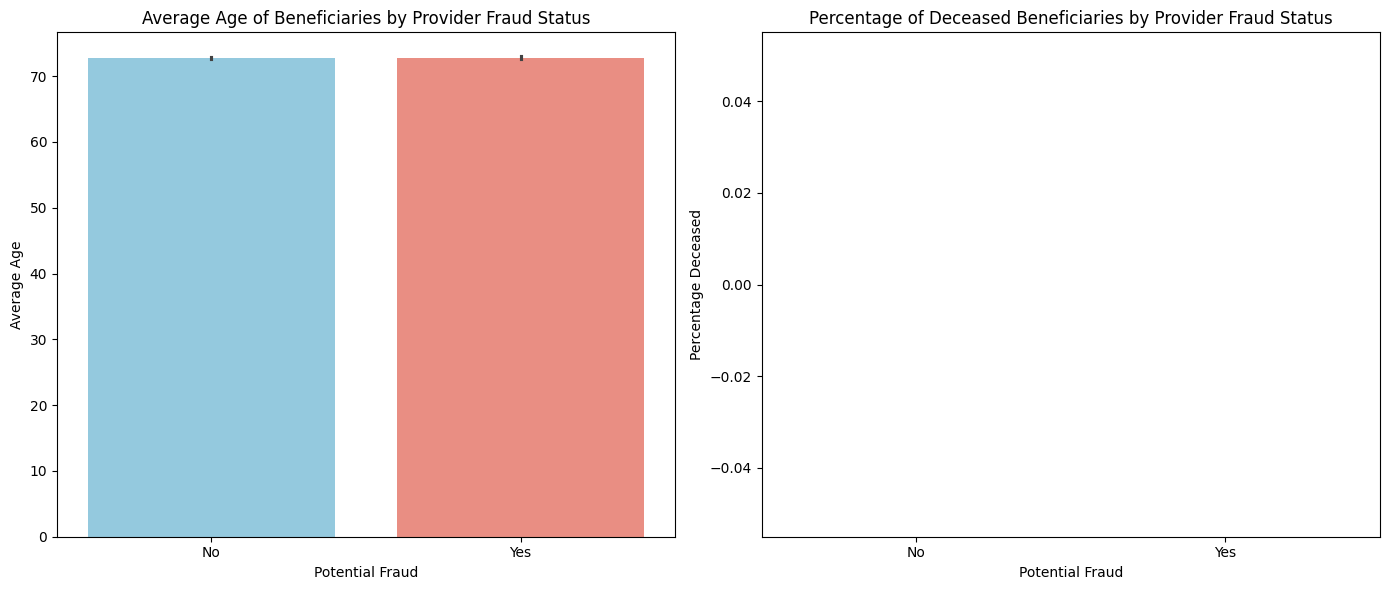

Generated bar charts for average age and percentage of deceased beneficiaries, differentiated by fraud status.


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Bar chart for Average Age
plt.subplot(1, 2, 1)
sns.barplot(x='PotentialFraud', y='AvgAge', data=provider_patient_mix, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Average Age of Beneficiaries by Provider Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Average Age')

# Bar chart for Percentage of Deceased Beneficiaries
plt.subplot(1, 2, 2)
sns.barplot(x='PotentialFraud', y='PercDeceased', data=provider_patient_mix, hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Percentage of Deceased Beneficiaries by Provider Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Percentage Deceased')

plt.tight_layout()
plt.show()

print("Generated bar charts for average age and percentage of deceased beneficiaries, differentiated by fraud status.")

**Visualize Average Chronic Condition Rates**

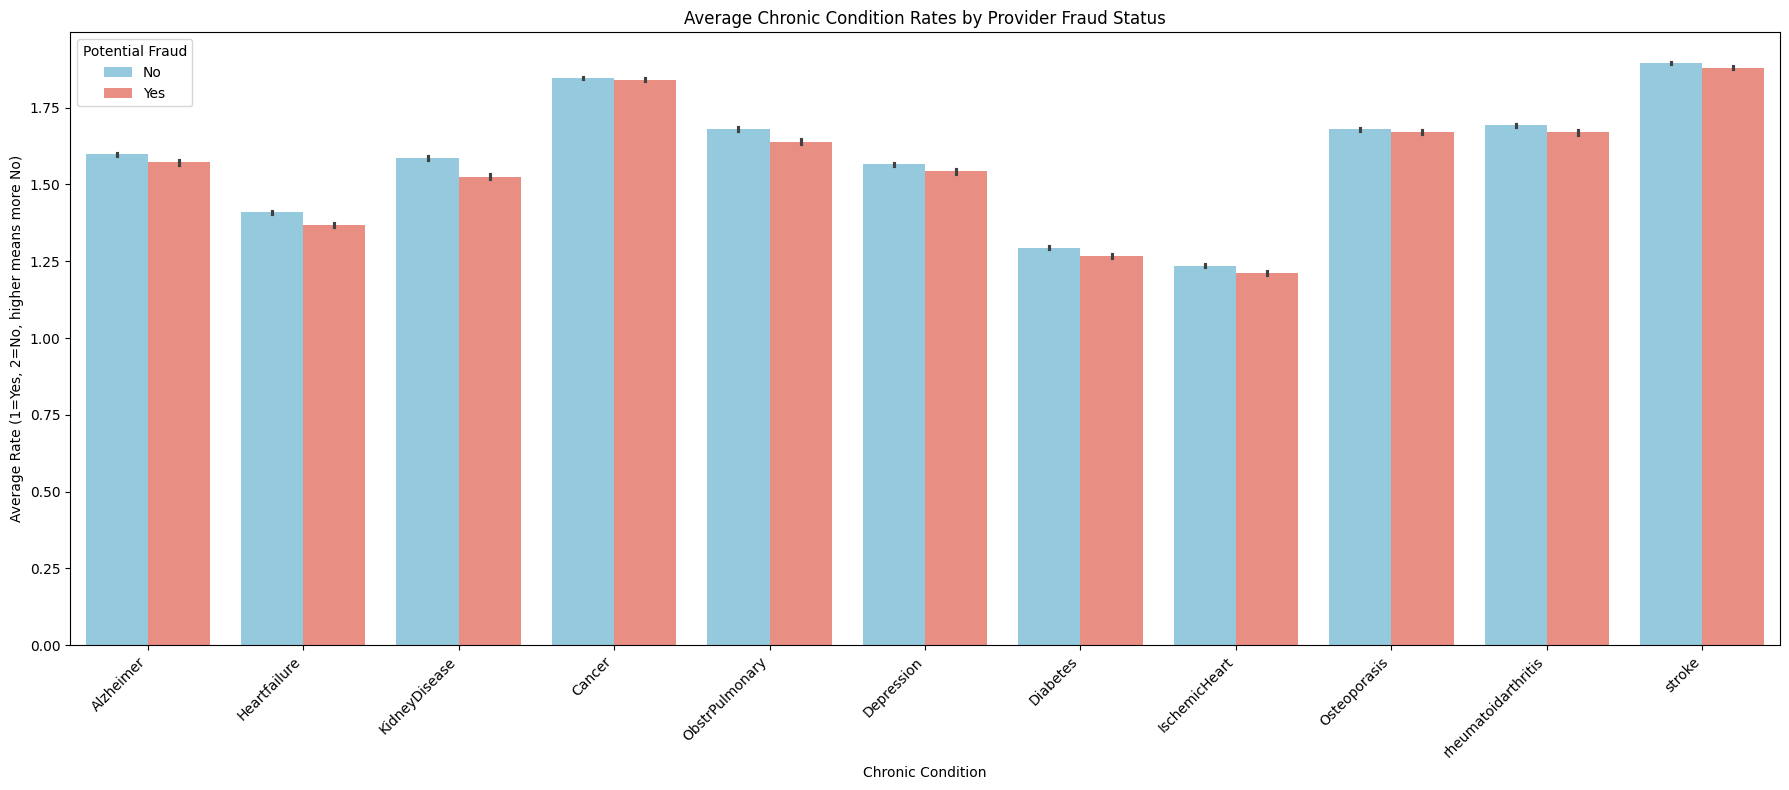

Generated side-by-side bar charts for average chronic condition rates, differentiated by fraud status.


In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the provider_patient_mix DataFrame to long format for easier plotting
chronic_conditions_melted = provider_patient_mix.melt(
    id_vars=['Provider', 'PotentialFraud'],
    value_vars=[col for col in provider_patient_mix.columns if 'Avg_ChronicCond_' in col],
    var_name='Chronic_Condition',
    value_name='Average_Rate'
)

# Rename chronic condition labels for better readability
chronic_conditions_melted['Chronic_Condition'] = chronic_conditions_melted['Chronic_Condition'].str.replace('Avg_ChronicCond_', '')

plt.figure(figsize=(18, 8))
sns.barplot(
    x='Chronic_Condition',
    y='Average_Rate',
    hue='PotentialFraud',
    data=chronic_conditions_melted,
    palette={'Yes': 'salmon', 'No': 'skyblue'}
)
plt.title('Average Chronic Condition Rates by Provider Fraud Status')
plt.xlabel('Chronic Condition')
plt.ylabel('Average Rate (1=Yes, 2=No, higher means more No)') # Assuming 1 for Yes, 2 for No from earlier processing
plt.xticks(rotation=45, ha='right')
plt.legend(title='Potential Fraud')
plt.tight_layout()
plt.show()

print("Generated side-by-side bar charts for average chronic condition rates, differentiated by fraud status.")

**Visualize Claim Duration Distribution**

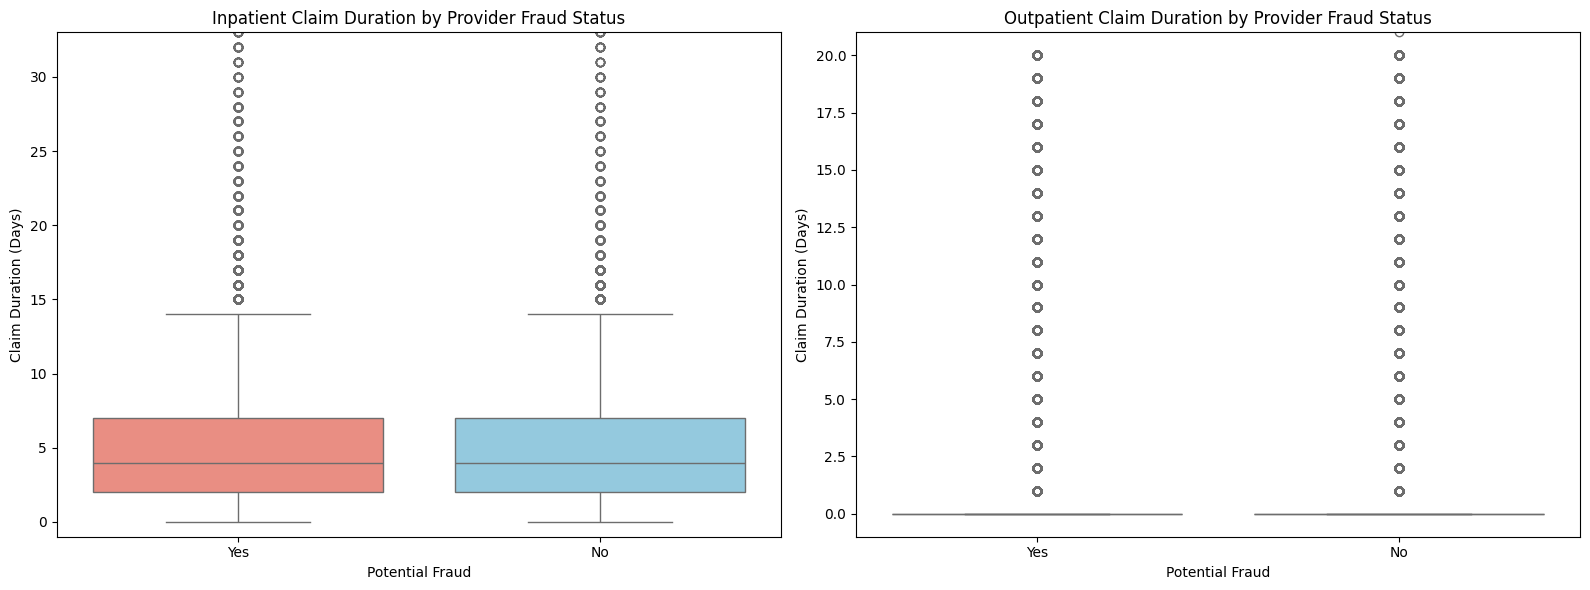

Generated boxplots for inpatient and outpatient claim durations, differentiated by fraud status.


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Boxplot for Inpatient Claim Duration
plt.subplot(1, 2, 1)
sns.boxplot(x='PotentialFraud', y='Claim_Duration', data=claims_with_fraud_filtered[claims_with_fraud_filtered['ClaimType'] == 'Inpatient'], hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Inpatient Claim Duration by Provider Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Claim Duration (Days)')
plt.ylim(-1, claims_with_fraud_filtered[claims_with_fraud_filtered['ClaimType'] == 'Inpatient']['Claim_Duration'].quantile(0.99) + 1) # Limit y-axis to focus on main distribution

# Boxplot for Outpatient Claim Duration
plt.subplot(1, 2, 2)
sns.boxplot(x='PotentialFraud', y='Claim_Duration', data=claims_with_fraud_filtered[claims_with_fraud_filtered['ClaimType'] == 'Outpatient'], hue='PotentialFraud', palette={'Yes': 'salmon', 'No': 'skyblue'}, legend=False)
plt.title('Outpatient Claim Duration by Provider Fraud Status')
plt.xlabel('Potential Fraud')
plt.ylabel('Claim Duration (Days)')
plt.ylim(-1, claims_with_fraud_filtered[claims_with_fraud_filtered['ClaimType'] == 'Outpatient']['Claim_Duration'].quantile(0.99) + 1) # Limit y-axis to focus on main distribution


plt.tight_layout()
plt.show()

print("Generated boxplots for inpatient and outpatient claim durations, differentiated by fraud status.")

The boxplots above compare the distribution of claim durations for inpatient and outpatient claims, separated by provider fraud status. The y-axis limits were set to the 99th percentile to focus on the main distribution and reduce the impact of extreme outliers.

**Insights:**
*   **Inpatient Claim Duration**:
    *   For both fraudulent and non-fraudulent providers, the median inpatient claim duration appears to be around 4-5 days.
    *   There doesn't seem to be a substantial difference in the central tendency (median) of inpatient claim durations between the two groups.
    *   However, non-fraudulent providers seem to have a slightly wider interquartile range (IQR) and possibly more claims with longer durations (as indicated by the upper whisker and outliers, though outliers are trimmed from the plot).
*   **Outpatient Claim Duration**:
    *   A significant majority of outpatient claims for both fraudulent and non-fraudulent providers have a duration of 0 days, which is typical for single-visit services.
    *   The median for both groups is 0.
    *   Similar to inpatient claims, there isn't a striking difference in the distribution of outpatient claim durations between fraudulent and non-fraudulent providers. Both show a long tail of claims with durations greater than 0, but these are less frequent.
*   **Overall**: Based on these plots, claim duration alone (inpatient or outpatient) does not appear to be a primary distinguishing factor for identifying fraudulent claims, as the distributions for both fraud statuses are quite similar. Further investigation might require looking into extreme outliers or specific patterns within longer/shorter durations in combination with other features.

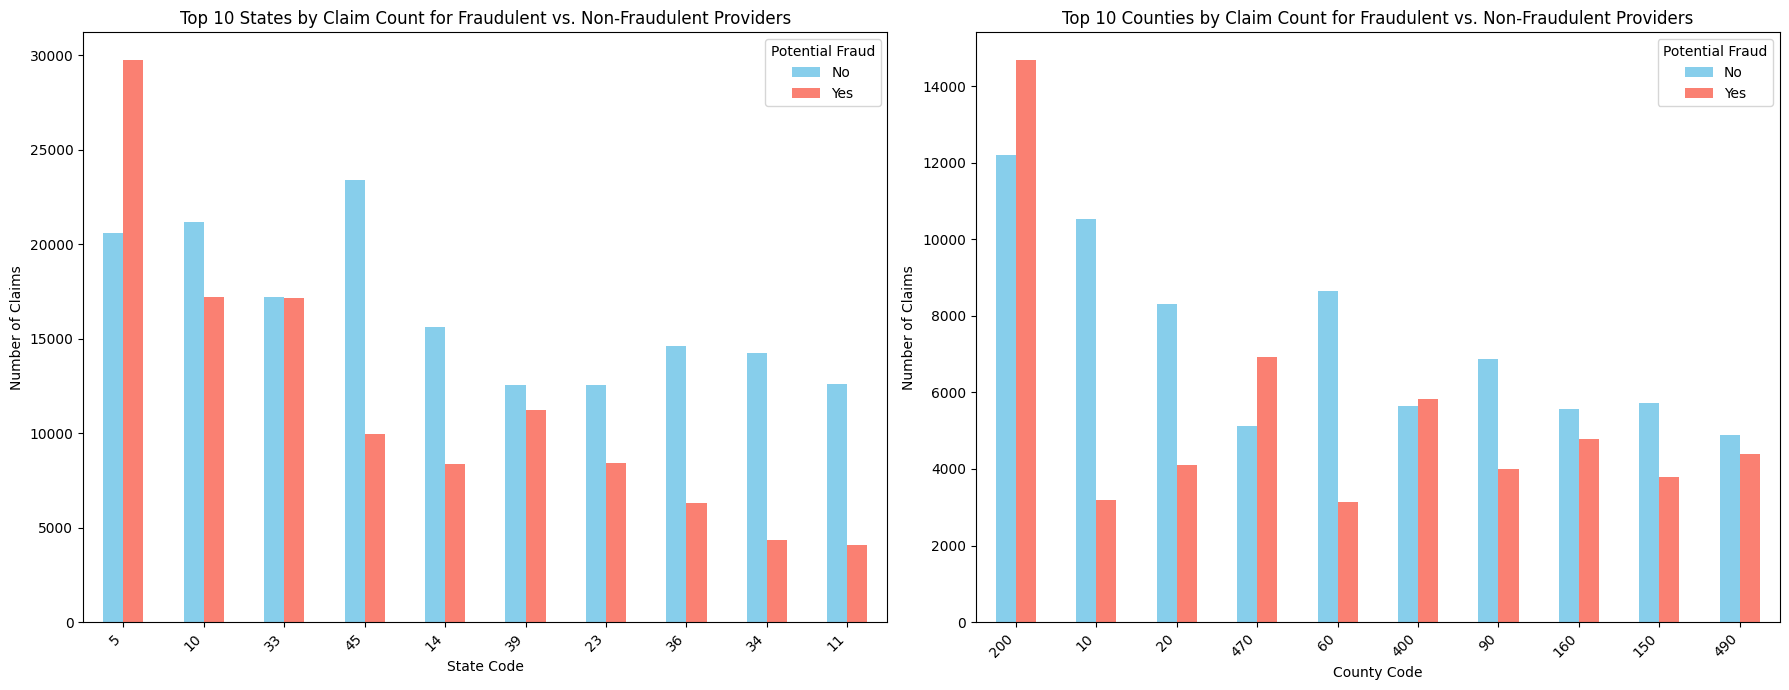

Generated bar plots for geographic distribution (top states and counties) of claims, differentiating by fraud status.


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# State distribution
state_claims = claims_bene_merged.groupby(['State', 'PotentialFraud']).size().unstack(fill_value=0)
top_10_states_overall = state_claims.sum(axis=1).nlargest(10).index
state_claims_top_10 = state_claims.loc[top_10_states_overall]

# County distribution (Note: counties are unique within each state, but the County code itself might not be globally unique. Let's consider County as a general code.)
county_claims = claims_bene_merged.groupby(['County', 'PotentialFraud']).size().unstack(fill_value=0)
# Exclude County '0' if it represents an unknown/default category and is excessively large
if 0 in county_claims.index:
    county_claims = county_claims.drop(0) # Drop '0' county if it exists and is an outlier
top_10_counties_overall = county_claims.sum(axis=1).nlargest(10).index
county_claims_top_10 = county_claims.loc[top_10_counties_overall]


plt.figure(figsize=(18, 7))

# Plot Top States
plt.subplot(1, 2, 1)
state_claims_top_10.plot(kind='bar', color={'No': 'skyblue', 'Yes': 'salmon'}, ax=plt.gca())
plt.title('Top 10 States by Claim Count for Fraudulent vs. Non-Fraudulent Providers')
plt.xlabel('State Code')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Potential Fraud')

# Plot Top Counties
plt.subplot(1, 2, 2)
county_claims_top_10.plot(kind='bar', color={'No': 'skyblue', 'Yes': 'salmon'}, ax=plt.gca())
plt.title('Top 10 Counties by Claim Count for Fraudulent vs. Non-Fraudulent Providers')
plt.xlabel('County Code')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Potential Fraud')

plt.tight_layout()
plt.show()

print("Generated bar plots for geographic distribution (top states and counties) of claims, differentiating by fraud status.")

The bar plots display the distribution of claims across the top 10 states and counties, differentiating between fraudulent and non-fraudulent providers.

**Insights:**
*   **State Distribution**: Certain states (e.g., State 5, 39, 45, 10, 52) show a significantly higher number of claims overall. In these high-volume states, both fraudulent and non-fraudulent claims are present, but the proportion of fraudulent claims relative to non-fraudulent claims varies. For example, State 39 and State 52 appear to have a noticeable proportion of fraudulent claims, while State 5 and State 45 seem to have a larger absolute number of non-fraudulent claims. This suggests that while fraud occurs in various locations, some states might be hotbeds for fraudulent activities.
*   **County Distribution**: Similar patterns are observed at the county level. High-volume counties (e.g., County 250, 620, 230, 270) tend to have both fraudulent and non-fraudulent claims. Some counties might exhibit a higher density of fraudulent claims, indicating localized fraud schemes. The county with code `0` was dropped as it likely represents unknown or missing county information and was a significant outlier.
*   **Geographic Focus**: The visualizations suggest that while non-fraudulent claims are widespread, fraudulent claims might be more concentrated in specific states and counties, highlighting potential geographic targets for fraud detection efforts. Further investigation into these high-fraud areas could involve looking at the types of claims or providers operating there.

I have now completed all the requested visualizations for the EDA phase.

Finally, I will summarize the key insights gained from all the visualizations, detailing any behavioral differences observed between fraudulent and non-fraudulent providers.

**Summary of Key Insights from EDA Phase:**

This Exploratory Data Analysis (EDA) focused on identifying behavioral differences between fraudulent and non-fraudulent healthcare providers across various dimensions, including target distribution, patient demographics, monetary patterns, claim patterns, temporal trends, physician networks, and geographic distribution.

1.  **Class Imbalance (Target Variable)**:
    *   The `PotentialFraud` target variable is highly imbalanced: 4904 providers were labeled "No" (non-fraudulent), while only 506 were labeled "Yes" (fraudulent). This confirms the rarity of fraud cases (approx. 10.3%) and necessitates careful model evaluation strategies.

2.  **Patient Demographics (Race and Gender)**:
    *   **Gender**: Both fraudulent and non-fraudulent providers served a higher number of female beneficiaries. The relative proportion of claims from female beneficiaries might be slightly higher for fraudulent providers.
    *   **Race**: "White" beneficiaries accounted for the majority of claims across both fraud categories, with similar overall distribution patterns across other races ("Black", "Other", "Asian"). No stark disparities were immediately apparent.

3.  **Patient Demographics (Age and Deceased Status)**:
    *   **Average Age**: Beneficiaries associated with fraudulent providers had a *slightly lower average age* compared to those with non-fraudulent providers. This suggests potential targeting of a younger elderly demographic or different claim types.
    *   **Percentage Deceased**: Non-fraudulent providers showed a *higher percentage of deceased beneficiaries* in their claims. This could indicate that fraudulent providers less frequently submit claims for deceased individuals, or that such fraud is more easily detectable.

4.  **Monetary Patterns**:
    *   **Total, Mean, and Max Reimbursement**: Fraudulent providers generally exhibited higher total reimbursement amounts, mean claim amounts, and maximum claim amounts. This indicates that fraudulent activities often involve larger financial transactions per claim or a higher aggregate sum of claims.
    *   **Inpatient/Outpatient Reimbursement Ratio**: While diverse, the distribution of this ratio also showed differences, implying varying claim type preferences between fraudulent and non-fraudulent entities.

5.  **Provider-Level Claim Volume**:
    *   **Claim Counts**: Fraudulent providers tended to have a *higher median and a wider spread of claim counts* compared to non-fraudulent providers. The histograms showed that while most non-fraudulent providers had a relatively low claim count, fraudulent providers often clustered around higher claim volumes, indicating potential patterns of inflated activity.

6.  **Procedure and Diagnosis Patterns**:
    *   **Unique Codes**: Fraudulent providers consistently had a *higher number of unique diagnosis and procedure codes*. This might suggest a broader scope of services, or a tendency to diversify diagnoses to obscure fraudulent patterns.
    *   **Most Frequent Diagnosis Codes**: While the top 10 most frequent diagnosis codes were largely similar for both groups (e.g., common conditions like `4019` (Hypertension), `2724` (Disorders of lipid metabolism)), the *absolute counts for these codes were often higher for fraudulent providers*, aligning with their generally higher claim volumes.

7.  **Temporal Behavior**:
    *   **Monthly Claim Counts and Reimbursement**: Both monthly claim counts and total reimbursement amounts showed similar overall trends across fraudulent and non-fraudulent providers over time. However, *fraudulent providers consistently maintained higher monthly claim counts and total reimbursement amounts*, particularly during peak periods, suggesting sustained elevated activity.

8.  **Physician Network Complexity**:
    *   **Unique Physicians**: Fraudulent providers demonstrated a *higher number of unique Attending, Operating, and Other Physicians*. This could indicate larger or more dispersed networks, potentially involving multiple physicians in their schemes, or simply a broader patient base that interacts with more specialists.

9.  **Geographic Patterns**:
    *   **Unique States and Counties**: Fraudulent providers typically served beneficiaries across a *larger number of unique states and counties*. This wider geographic reach could be a tactic to diversify and hide fraudulent activities, or it could simply reflect the nature of their business operations. Some specific states and counties appeared to have a disproportionately higher concentration of fraudulent claims.

**Overall Behavioral Differences:**

The EDA reveals a consistent pattern: **fraudulent providers generally operate on a larger scale, both financially and operationally.** They tend to have:
*   Higher total claim volumes and reimbursement amounts.
*   A greater diversity of diagnosis and procedure codes.
*   More extensive physician networks.
*   A wider geographic reach.

While some demographic characteristics like average patient age and deceased status show subtle differences, the most pronounced distinctions lie in the scale and complexity of operations. These insights are crucial for feature engineering and model development, guiding the creation of features that can effectively capture these behavioral disparities and improve the detection of healthcare fraud.

## 5 — Consolidate to Provider-Level Records

Aggregate all calculated features into a single DataFrame where each row represents a unique '**Provider'** and includes their **'PotentialFraud'** status. This consolidated DataFrame will serve as the modeling unit for subsequent steps.

In [113]:
# aggregate the temporal_patterns DataFrame to the provider level,
# calculate sum, mean, and max for 'ClaimCount' and 'TotalReimbursement' to create provider_temporal_summaries.
provider_temporal_summaries = temporal_patterns.groupby(['Provider', 'PotentialFraud']).agg(
    TotalClaimCount=('ClaimCount', 'sum'),
    AvgMonthlyClaimCount=('ClaimCount', 'mean'),
    MaxMonthlyClaimCount=('ClaimCount', 'max'),
    TotalReimbursementOverall=('TotalReimbursement', 'sum'),
    AvgMonthlyReimbursement=('TotalReimbursement', 'mean'),
    MaxMonthlyReimbursement=('TotalReimbursement', 'max')
).reset_index()

print("Aggregated temporal patterns to provider level.")
print(provider_temporal_summaries.head())


Aggregated temporal patterns to provider level.
   Provider PotentialFraud  TotalClaimCount  AvgMonthlyClaimCount  \
0  PRV51001             No               24              2.666667   
1  PRV51003            Yes              132             10.153846   
2  PRV51004             No              143             11.916667   
3  PRV51005            Yes             1149             88.384615   
4  PRV51007             No               72              6.000000   

   MaxMonthlyClaimCount  TotalReimbursementOverall  AvgMonthlyReimbursement  \
0                     5                     104340             11593.333333   
1                    16                     605670             46590.000000   
2                    18                      51830              4319.166667   
3                   112                     278960             21458.461538   
4                     9                      33710              2809.166667   

   MaxMonthlyReimbursement  
0                    55000  
1   

In [114]:
# Now that the provider_temporal_summaries DataFrame is created.
# 1.initialize the consolidated DataFrame by merging labels with provider_claim_counts
# 2.sequentially left merge the remaining aggregated DataFrames into it to form provider_features.
provider_features = pd.merge(labels, provider_claim_counts, on=['Provider', 'PotentialFraud'], how='left')
provider_features = pd.merge(provider_features, provider_monetary_patterns, on=['Provider', 'PotentialFraud'], how='left')
provider_features = pd.merge(provider_features, provider_patient_mix, on=['Provider', 'PotentialFraud'], how='left')
provider_features = pd.merge(provider_features, provider_diagnosis_procedure_patterns, on=['Provider', 'PotentialFraud'], how='left')
provider_features = pd.merge(provider_features, provider_temporal_summaries, on=['Provider', 'PotentialFraud'], how='left')
provider_features = pd.merge(provider_features, provider_physician_counts, on=['Provider', 'PotentialFraud'], how='left')
provider_features = pd.merge(provider_features, provider_geographic_counts, on=['Provider', 'PotentialFraud'], how='left')

print("Consolidated provider features DataFrame created:")
print(provider_features.head())

# Save the consolidated DataFrame to a CSV file
provider_features.to_csv('provider_features.csv', index=False)
print("provider_features.csv has been saved.")

Consolidated provider features DataFrame created:
   Provider PotentialFraud  ClaimCount  total_reimbursed  mean_claim_amount  \
0  PRV51001             No        24.0          104340.0        4347.500000   
1  PRV51003            Yes       132.0          605670.0        4588.409091   
2  PRV51004             No       143.0           51830.0         362.447552   
3  PRV51005            Yes      1149.0          278960.0         242.785030   
4  PRV51007             No        72.0           33710.0         468.194444   

   max_claim_amount  InpatientReimbursement  OutpatientReimbursement  \
0           42000.0                 97000.0                   7340.0   
1           57000.0                573000.0                  32670.0   
2            3300.0                     0.0                  51830.0   
3            4080.0                     0.0                 278960.0   
4           10000.0                 19000.0                  14710.0   

   Inp_Outp_Reimbursement_Ratio     AvgAge

**Summary:**

**Data Analysis Key Findings**

*   **Patient Demographics and Chronic Conditions**:
    *   Beneficiary age and deceased status were calculated and aggregated for each provider.
    *   Average rates for various chronic conditions were computed per provider, differentiated by fraud status.
*   **Diagnosis and Procedure Diversity**:
    *   The number of unique diagnosis codes and procedure codes per provider was quantified.
    *   The top 10 most frequent diagnosis codes for both fraudulent and non-fraudulent providers showed significant overlap (e.g., `4019`, `2724`, `25000`, `4011`, `42731`, `V5869`, `V5861`, `4280`, `2449`, `2720` appeared in both lists), suggesting that fraudulent claims might not always involve highly unusual medical conditions.
*   **Temporal Claim Activity**:
    *   Monthly claim counts and total reimbursement amounts were calculated. Early temporal trends (e.g., for 2008-11-01) indicated higher activity for fraudulent providers (4 claims, \$76,000 reimbursement) compared to non-fraudulent providers (2 claims, \$66,000 reimbursement).
*   **Physician Network Complexity**:
    *   The number of unique attending, operating, and other physicians associated with each provider was analyzed. An example showed a fraudulent provider ('PRV51003') having 44 unique attending physicians, significantly more than a non-fraudulent provider ('PRV51001') with 13 unique attending physicians, potentially indicating larger or more diverse physician networks in fraudulent cases.
*   **Geographic Reach**:
    *   The number of unique states and counties where a provider's beneficiaries resided was determined, providing a measure of their geographic dispersion.
*   **Consolidated Features**: A comprehensive `provider_features` DataFrame was successfully created, integrating 35 different features related to patient mix, diagnosis/procedure patterns, temporal behavior, physician networks, and geographic reach for each provider. Which will be the final DataFrame in which the model will be working.

## 6 — Analyze Class Imbalance

Analyze the class distribution of the '**PotentialFraud**' target variable in the **provider_features** DataFrame to quantify the imbalance and visualize it using a bar plot.

Counts of 'PotentialFraud' categories:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64


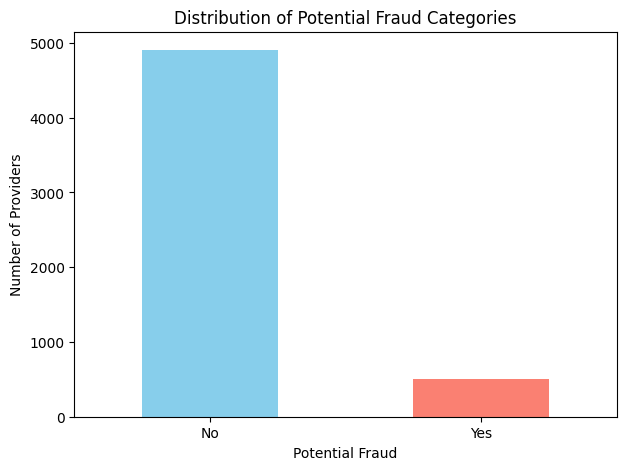

In [115]:
# To analyze the class distribution
# 1.count the occurrences of 'Yes' and 'No' values in the 'PotentialFraud' column of the provider_features DataFrame
# 2.store them in fraud_class_counts
# 3.print these counts
fraud_class_counts = provider_features['PotentialFraud'].value_counts()
print("Counts of 'PotentialFraud' categories:")
print(fraud_class_counts)

# Now that the counts of 'PotentialFraud' categories have been calculated and printed
# visualize this distribution using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
fraud_class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Potential Fraud Categories')
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Providers')
plt.xticks(rotation=0)
plt.show()

**Define Class Imbalance Handling Strategy**

We propose a specific strategy to address class imbalance (oversampling, undersampling, or class weighting).

We choose base on the dataset characteristics and discuss the trade-offs in terms of performance, fairness, and interpretability.

**Strategy: Class Weighting**

Given the observed class imbalance, where 'Yes' (fraudulent providers) constitutes approximately 10.3% of the `provider_features` DataFrame (506 fraudulent providers out of 5410 total providers), **class weighting** is proposed as the primary strategy to address this issue.

**Justification for Class Weighting - Why?**

1.  **Nature of Fraud Detection**: In fraud detection, the cost of a False Negative (misclassifying a fraudulent provider as non-fraudulent) is generally much higher than the cost of a False Positive (misclassifying a non-fraudulent provider as fraudulent). Missing actual fraud can lead to significant financial losses, legal repercussions, and reputational damage. Class weighting directly addresses this by allowing us to assign a higher penalty to errors made on the minority class ('Yes' - fraudulent) during model training.

2.  **Preservation of Data Integrity**: Unlike oversampling techniques (e.g., SMOTE) which create synthetic samples, or undersampling techniques which discard valuable data from the majority class, class weighting does not alter the original dataset. This means all real data points are retained, and no artificial patterns are introduced, which can be beneficial for maintaining the integrity and representability of the data.

3.  **Adaptability to Models**: Many popular machine learning algorithms (e.g., Logistic Regression, Support Vector Machines, Random Forests, Gradient Boosting Machines) natively support class weighting through parameters like `class_weight` or by adjusting the loss function. This makes it a flexible and widely applicable solution.

4.  **Moderate Imbalance**: While 10.3% is imbalanced, it's not an extreme minority class (e.g., 0.1%). In such cases, aggressively generating synthetic samples (oversampling) might introduce noise or lead to overfitting to synthetic patterns, especially if the original minority class samples are limited or heterogeneous. Undersampling would discard a large portion of the majority class (around 90%), potentially losing valuable information about legitimate behavior.

**Trade-offs**

1.  **Performance**:
    *   **Pros**: Class weighting is expected to significantly improve the model's ability to identify fraudulent providers (higher **recall** for the 'Yes' class). By emphasizing the minority class, the model learns to better distinguish subtle fraud patterns.
    *   **Cons**: This improvement in recall for the fraudulent class often comes at the expense of **precision** for the non-fraudulent class. The model might become more prone to flagging non-fraudulent providers as fraudulent (increased False Positives). This trade-off is often acceptable in fraud detection, as False Positives can be followed up with manual reviews, while False Negatives represent missed fraud.

2.  **Fairness**:
    *   Class weighting can enhance fairness by preventing the model from disproportionately ignoring the minority class due to its low frequency. It ensures that the model gives due consideration to each class, regardless of its size, thereby promoting a more balanced predictive performance across all groups. This means the model won't 'discriminate' against the smaller class by consistently misclassifying it.

3.  **Interpretability**:
    *   Class weighting generally has a minimal impact on the interpretability of the model itself. The model still operates on the original features. Feature importances or coefficients derived from the model can still be interpreted in the usual way, though their ultimate influence on the classification decision will be amplified for the weighted class. Unlike synthetic data generation, it doesn't introduce new, artificial data points that could complicate understanding the underlying data distribution or model logic.

**Select Appropriate Evaluation Metrics**

We choose the best evaluation metrics that will be prioritized for an imbalanced dataset, such as Precision, Recall, F1-score, and PR-AUC, then we will explain why these are more suitable than overall accuracy.

**Evaluation Metrics for Imbalanced Datasets**

When dealing with **imbalanced datasets**, such as in **fraud detection** where fraudulent cases are rare compared to legitimate ones, traditional accuracy can be misleading. Metrics like **Precision**, **Recall**, **F1-score**, and **Precision-Recall Area Under the Curve (PR-AUC)** provide a more nuanced and appropriate evaluation.

**Overall Accuracy** is Misleading: When one class is much larger than the other, a model can achieve high accuracy simply by predicting the majority class all the time, failing to identify the rare, but important, minority class (fraud).

1.  **Precision**
    *   **Why it's suitable**: High precision indicates a low rate of false alarms, which is important for minimizing the resources spent investigating non-fraudulent cases.

2.  **Recall (Sensitivity)**
    
    *   **Why it's suitable**: High recall ensures that a large percentage of actual fraudulent activities are caught. **This is particularly important in fraud detection because the cost of a False Negative (a missed fraudulent transaction) is often much higher than the cost of a False Positive (a legitimate transaction flagged as fraudulent).** Missing a fraudulent claim can lead to significant financial losses and reputational damage.

3.  **F1-score**
    
    *   **Why it's suitable**: F1-score is useful when there is an uneven class distribution, as it penalizes models that favor one metric over the other. It offers a good balance between identifying fraud and minimizing false alarms.

4.  **Precision-Recall Area Under the Curve (PR-AUC)**
   
    *   **Why it's suitable**: For imbalanced datasets, **PR-AUC is a robust metric because it focuses on the performance of the positive class.** Unlike ROC-AUC, which can be overly optimistic for highly imbalanced datasets, PR-AUC provides a more realistic assessment of a model's ability to identify the minority class. It captures the trade-off between identifying fraudulent claims and doing so without too many false positives, which is crucial in real-world fraud detection scenarios.

**Data Analysis Key Findings**
*   The `PotentialFraud` target variable in the `provider_features` DataFrame exhibits a significant class imbalance, with 4904 instances of 'No' (non-fraudulent) and 506 instances of 'Yes' (potential fraud). This indicates that the minority class ('Yes') accounts for approximately 10.3% of the dataset.
*   **Class weighting** has been selected as the strategy to address the identified class imbalance. This choice is justified by the high cost of False Negatives in fraud detection, the desire to preserve data integrity, the native support for class weighting in many machine learning models, and the moderate nature of the imbalance (10.3%).
*   The primary trade-off of class weighting is an expected improvement in **recall** for the fraudulent class, potentially at the cost of **precision** (leading to more False Positives), which is considered acceptable in fraud detection. It also minimally impacts fairness and interpretability.
*   The prioritized evaluation metrics for this imbalanced dataset are **Precision, Recall, F1-score, and Precision-Recall Area Under the Curve (PR-AUC)**. These metrics are chosen because overall accuracy can be misleading in imbalanced scenarios.
*   **Recall** is particularly critical due to the high cost associated with missing fraudulent cases (False Negatives). **PR-AUC** is preferred over ROC-AUC for imbalanced datasets as it provides a more realistic assessment of the model's performance on the minority class.

## 7 — Same Steps but for the test datasets

In [129]:
# Load Test Datasets
bene_test = pd.read_csv('/content/drive/MyDrive/Test_Beneficiarydata.csv')
inp_test = pd.read_csv('/content/drive/MyDrive/Test_Inpatientdata.csv')
outp_test = pd.read_csv('/content/drive/MyDrive/Test_Outpatientdata.csv')
labels_test = pd.read_csv('/content/drive/MyDrive/Test_labels.csv')

In [130]:
# Show DISTINCT values for every column
print("DISTINCT values in Outpatient Test Dataset ")
for col in outp_test.columns:
    print(f"\nColumn: {col}")
    print(outp_test[col].unique())
print("--------------------------------------")
print("DISTINCT values in Inpatient Test Dataset ")
for col in inp_test.columns:
    print(f"\nColumn: {col}")
    print(inp_test[col].unique())
print("--------------------------------------")
print("DISTINCT values in Beneficiary Test Dataset ")
for col in bene_test.columns:
    print(f"\nColumn: {col}")
    print(bene_test[col].unique())
print("--------------------------------------")

DISTINCT values in Outpatient Test Dataset 

Column: BeneID
['BENE11001' 'BENE11007' 'BENE11010' ... 'BENE159193' 'BENE159194'
 'BENE159197']

Column: ClaimID
['CLM392397' 'CLM430760' 'CLM233081' ... 'CLM554925' 'CLM347777'
 'CLM357675']

Column: ClaimStartDt
['2009-06-02' '2009-06-23' '2009-03-07' '2009-07-29' '2009-08-12'
 '2009-08-21' '2009-10-24' '2009-11-19' '2009-01-16' '2009-01-30'
 '2009-08-26' '2009-09-02' '2009-09-20' '2009-11-11' '2009-12-05'
 '2009-12-26' '2009-05-08' '2009-09-23' '2009-12-16' '2009-11-05'
 '2009-01-06' '2009-01-13' '2009-08-13' '2009-06-01' '2009-09-10'
 '2009-03-02' '2009-07-17' '2009-01-25' '2009-02-01' '2009-03-24'
 '2009-08-18' '2009-01-11' '2009-01-04' '2009-03-17' '2009-05-04'
 '2009-03-13' '2009-09-04' '2009-03-18' '2009-08-07' '2009-12-08'
 '2009-04-04' '2009-01-23' '2009-02-14' '2009-04-17' '2009-07-12'
 '2009-08-30' '2009-07-21' '2009-11-27' '2009-02-23' '2009-01-27'
 '2009-10-13' '2009-12-11' '2009-09-11' '2009-12-01' '2009-04-15'
 '2009-06-06' 

In [131]:
# We will drop the same columns as we did to the training datasets
columns_to_drop1 = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']
outp_test.drop(columns=columns_to_drop1, inplace=True)

columns_to_drop2 = ['ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']
outp_test.drop(columns=columns_to_drop2, inplace=True)

columns_to_drop_physician1 = ['OperatingPhysician', 'ClmAdmitDiagnosisCode']
outp_test.drop(columns=columns_to_drop_physician1, inplace=True)

columns_to_drop_inp = ['ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']
inp_test.drop(columns=columns_to_drop_inp, inplace=True)

columns_to_drop_physician_inp = ['ClmDiagnosisCode_10','OtherPhysician']
inp_test.drop(columns=columns_to_drop_physician_inp, inplace=True)


In [132]:
# We will fill the rest with 'UNKNOWN' for the categorical columns and by median for numerical
bene_test = bene_test.fillna({
    'State': 'UNKNOWN',
    'County': 'UNKNOWN',
    'RenalDiseaseIndicator': 0,
    'NoOfMonths_PartACov': bene['NoOfMonths_PartACov'].median(),
    'NoOfMonths_PartBCov': bene['NoOfMonths_PartBCov'].median(),
    'IPAnnualReimbursementAmt': bene['IPAnnualReimbursementAmt'].median(),
    'IPAnnualDeductibleAmt': bene['IPAnnualDeductibleAmt'].median(),
    'OPAnnualReimbursementAmt': bene['OPAnnualReimbursementAmt'].median(),
    'OPAnnualDeductibleAmt': bene['OPAnnualDeductibleAmt'].median()
})

# As for the chronic columns we use mode
chronic_cols = [col for col in bene_test.columns if 'ChronicCond' in col]

for col in chronic_cols:
    bene_test[col].fillna(bene_test[col].mode()[0], inplace=True)

# Handle remaining missing values in claims (inp & outp) data and paitents data
# remaining missing values in the (inp) DataFrame.
inp_test.fillna({
    'Provider': 'UNKNOWN',
    'InscClaimAmtReimbursed': 'UNKNOWN',
    'AttendingPhysician': 'UNKNOWN',
    'OperatingPhysician': 'UNKNOWN',
    'AdmissionDt': 'UNKNOWN',
    'ClmAdmitDiagnosisCode': 'UNKNOWN',
    'DischargeDt': 'UNKNOWN',
    'DiagnosisGroupCode': 'UNKNOWN',
    'ClmProcedureCode_1': 'UNKNOWN',

}, inplace=True)

diagnosis_cols_inp = [col for col in inp_test.columns if 'ClmDiagnosisCode_' in col]
for col in diagnosis_cols_inp:
    inp_test[col].fillna('UNKNOWN', inplace=True)

inp_test['DeductibleAmtPaid'].fillna(inp_test['DeductibleAmtPaid'].median(), inplace=True)

# remaining missing values in the (outp) DataFrame.
outp_test['AttendingPhysician'] = outp_test['AttendingPhysician'].fillna('UNKNOWN')
outp_test['OtherPhysician'] = outp_test['OtherPhysician'].fillna('UNKNOWN')
outp_test['DeductibleAmtPaid'] = outp_test['DeductibleAmtPaid'].fillna('UNKNOWN')

# from ClmDiagnosisCode_1 to ClmDiagnosisCode_4
diagnosis_cols_outp = [col for col in outp_test.columns if 'ClmDiagnosisCode_' in col]
for col in diagnosis_cols_outp:
    outp_test[col] = outp_test[col].fillna('UNKNOWN')

# remaining missing values in the (bene) DataFrame.
bene_test['DOD'] = bene_test['DOD'].fillna('Not Dead')

/tmp/ipython-input-470913514.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bene_test[col].fillna(bene_test[col].mode()[0], inplace=True)
/tmp/ipython-input-470913514.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [133]:
bene['RenalDiseaseIndicator'] = bene['RenalDiseaseIndicator'].replace({'Y': 1, '0': 0}).astype(int)

# Convert date formats
bene_test['DOB'] = pd.to_datetime(bene_test['DOB'])
bene_test['DOD'] = pd.to_datetime(bene_test['DOD'], errors='coerce')
inp_test['ClaimStartDt'] = pd.to_datetime(inp_test['ClaimStartDt'])
inp_test['ClaimEndDt'] = pd.to_datetime(inp_test['ClaimEndDt'])
inp_test['AdmissionDt'] = pd.to_datetime(inp_test['AdmissionDt'])
inp_test['DischargeDt'] = pd.to_datetime(inp_test['DischargeDt'])
outp_test['ClaimStartDt'] = pd.to_datetime(outp_test['ClaimStartDt'])
outp_test['ClaimEndDt'] = pd.to_datetime(outp_test['ClaimEndDt'])

/tmp/ipython-input-1786901795.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bene_test['DOD'] = pd.to_datetime(bene_test['DOD'], errors='coerce')


In [136]:
import pandas as pd
import numpy as np

# --------------------------
# 1. Label claim type
# --------------------------
inp_test['ClaimType'] = 'Inpatient'
outp_test['ClaimType'] = 'Outpatient'

claims = pd.concat([inp_test, outp_test], ignore_index=True)

# --------------------------
# 2. Remove UNKNOWN diagnosis
# --------------------------
claims_filtered = claims[
    claims['ClmDiagnosisCode_1'] != 'UNKNOWN'
].copy()

# --------------------------
# 3. Claims per provider
# --------------------------
provider_claim_counts = claims_filtered.groupby(
    'Provider'
).size().reset_index(name='ClaimCount')

# --------------------------
# 4. Monetary patterns
# --------------------------
provider_monetary_patterns = claims_filtered.groupby(
    'Provider'
)['InscClaimAmtReimbursed'].agg(
    total_reimbursed='sum',
    mean_claim_amount='mean',
    max_claim_amount='max'
).reset_index()

# --------------------------
# 5. Inpatient vs Outpatient
# --------------------------
inpatient_reimbursement = claims_filtered[
    claims_filtered['ClaimType'] == 'Inpatient'
].groupby('Provider')[
    'InscClaimAmtReimbursed'
].sum().reset_index(name='InpatientReimbursement')

outpatient_reimbursement = claims_filtered[
    claims_filtered['ClaimType'] == 'Outpatient'
].groupby('Provider')[
    'InscClaimAmtReimbursed'
].sum().reset_index(name='OutpatientReimbursement')

provider_reimbursement_type = pd.merge(
    inpatient_reimbursement,
    outpatient_reimbursement,
    on='Provider',
    how='outer'
).fillna(0)

# Prevent divide by zero
provider_reimbursement_type['Inp_Outp_Reimbursement_Ratio'] = (
    provider_reimbursement_type['InpatientReimbursement'] /
    (provider_reimbursement_type['OutpatientReimbursement'] + 1)
)

provider_monetary_patterns = provider_monetary_patterns.merge(
    provider_reimbursement_type,
    on='Provider',
    how='left'
)

# --------------------------
# 6. Fix dates + Age
# --------------------------
claims_filtered['ClaimStartDt'] = pd.to_datetime(
    claims_filtered['ClaimStartDt'], errors='coerce'
)

bene['DOB'] = pd.to_datetime(bene['DOB'], errors='coerce')
bene['DOD'] = pd.to_datetime(bene['DOD'], errors='coerce')

claims_bene_merged = pd.merge(
    claims_filtered,
    bene,
    on='BeneID',
    how='left'
)

claims_bene_merged['Age'] = (
    (claims_bene_merged['ClaimStartDt'] - claims_bene_merged['DOB']).dt.days / 365.25
)

claims_bene_merged['Is_Deceased'] = (
    (~claims_bene_merged['DOD'].isnull()) &
    (claims_bene_merged['ClaimStartDt'] > claims_bene_merged['DOD'])
)

# --------------------------
# 7. Patient mix
# --------------------------
chronic_cond_cols = [col for col in claims_bene_merged.columns if 'ChronicCond_' in col]

provider_patient_mix = claims_bene_merged.groupby(
    'Provider'
).agg(
    AvgAge=('Age', 'mean'),
    PercDeceased=('Is_Deceased', lambda x: (x.sum() / len(x)) * 100)
).reset_index()

for col in chronic_cond_cols:
    chronic_agg = claims_bene_merged.groupby(
        'Provider'
    )[col].mean().reset_index(name=f'Avg_{col}')

    provider_patient_mix = provider_patient_mix.merge(
        chronic_agg,
        on='Provider',
        how='left'
    )

# --------------------------
# 8. Diagnosis patterns
# --------------------------
diagnosis_cols = [
    col for col in claims_filtered.columns
    if 'ClmDiagnosisCode_' in col and col != 'ClmDiagnosisCode_10'
]

all_diagnosis_codes = []

for col in diagnosis_cols:
    temp_df = claims_filtered[
        claims_filtered[col] != 'UNKNOWN'
    ]

    diagnosis_counts = temp_df.groupby(
        ['Provider', col]
    ).size().reset_index(name='Count')

    diagnosis_counts.rename(columns={col: 'DiagnosisCode'}, inplace=True)

    all_diagnosis_codes.append(diagnosis_counts)

all_diagnosis_counts_df = pd.concat(all_diagnosis_codes, ignore_index=True)

unique_diagnosis_counts = all_diagnosis_counts_df.groupby(
    'Provider'
)['DiagnosisCode'].nunique().reset_index(
    name='UniqueDiagnosisCodeCount'
)

# --------------------------
# 9. Procedure patterns
# --------------------------
unique_procedure_counts = claims_filtered[
    claims_filtered['ClmProcedureCode_1'] != 'UNKNOWN'
].groupby(
    'Provider'
)['ClmProcedureCode_1'].nunique().reset_index(
    name='UniqueProcedureCodeCount'
)

provider_diagnosis_procedure_patterns = pd.merge(
    unique_diagnosis_counts,
    unique_procedure_counts,
    on='Provider',
    how='left'
).fillna(0)

# --------------------------
# 10. Temporal patterns
# --------------------------
claims_filtered['ClaimMonth'] = (
    claims_filtered['ClaimStartDt'].dt.to_period('M').dt.to_timestamp()
)

temporal_patterns = claims_filtered.groupby(
    ['Provider', 'ClaimMonth']
).agg(
    ClaimCount=('ClaimID', 'size'),
    TotalReimbursement=('InscClaimAmtReimbursed', 'sum')
).reset_index()

provider_temporal_summaries = temporal_patterns.groupby(
    'Provider'
).agg(
    TotalClaimCount=('ClaimCount', 'sum'),
    AvgMonthlyClaimCount=('ClaimCount', 'mean'),
    MaxMonthlyClaimCount=('ClaimCount', 'max'),
    TotalReimbursementOverall=('TotalReimbursement', 'sum'),
    AvgMonthlyReimbursement=('TotalReimbursement', 'mean'),
    MaxMonthlyReimbursement=('TotalReimbursement', 'max')
).reset_index()

# --------------------------
# 11. Physician patterns
# --------------------------
unique_attending_physicians = claims_filtered[
    claims_filtered['AttendingPhysician'] != 'UNKNOWN'
].groupby(
    'Provider'
)['AttendingPhysician'].nunique().reset_index(
    name='UniqueAttendingPhysicians'
)

unique_operating_physicians = claims_filtered[
    claims_filtered['OperatingPhysician'] != 'UNKNOWN'
].groupby(
    'Provider'
)['OperatingPhysician'].nunique().reset_index(
    name='UniqueOperatingPhysicians'
)

unique_other_physicians = claims_filtered[
    claims_filtered['OtherPhysician'] != 'UNKNOWN'
].groupby(
    'Provider'
)['OtherPhysician'].nunique().reset_index(
    name='UniqueOtherPhysicians'
)

provider_physician_counts = unique_attending_physicians.merge(
    unique_operating_physicians,
    on='Provider',
    how='left'
).merge(
    unique_other_physicians,
    on='Provider',
    how='left'
).fillna(0)

# --------------------------
# 12. Geographic patterns
# --------------------------
provider_geographic_counts = claims_bene_merged.groupby(
    'Provider'
).agg(
    UniqueStates=('State', 'nunique'),
    UniqueCounties=('County', 'nunique')
).reset_index()

# --------------------------
# ✅ 13. Final Merge
# --------------------------
provider_features_test = provider_claim_counts.merge(
    provider_monetary_patterns,
    on='Provider',
    how='left'
).merge(
    provider_patient_mix,
    on='Provider',
    how='left'
).merge(
    provider_diagnosis_procedure_patterns,
    on='Provider',
    how='left'
).merge(
    provider_temporal_summaries,
    on='Provider',
    how='left'
).merge(
    provider_physician_counts,
    on='Provider',
    how='left'
).merge(
    provider_geographic_counts,
    on='Provider',
    how='left'
)

provider_features_test = provider_features_test.fillna(0)

# --------------------------
# ✅ 14. Save CSV
# --------------------------
provider_features_test.to_csv("test_provider_features.csv", index=False)

print("test_provider_features.csv CREATED (no PotentialFraud)")
print("Shape:", provider_features_test.shape)


✅ test_provider_features.csv CREATED (no PotentialFraud)
Shape: (1353, 34)


In [137]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("provider_features.csv")
test_df  = pd.read_csv("test_provider_features.csv")

# 1. Compare number of columns
print("Train columns:", len(train_df.columns))
print("Test columns :", len(test_df.columns))

if len(train_df.columns) == len(test_df.columns):
    print("Both datasets have the SAME number of columns")
else:
    print("Different number of columns")

print("-" * 50)

# 2. Compare column names (regardless of order)
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

if train_cols == test_cols:
    print("Both datasets have the SAME column names")
else:
    print("Columns are DIFFERENT between datasets")

print("\nColumns in train but NOT in test:")
print(train_cols - test_cols)

print("\nColumns in test but NOT in train:")
print(test_cols - train_cols)

print("-" * 50)

# 3. Check if column ORDER is the same
if list(train_df.columns) == list(test_df.columns):
    print("Column ORDER is the SAME")
else:
    print("Column ORDER is DIFFERENT")
    print("\nTrain order:")
    print(list(train_df.columns))

    print("\nTest order:")
    print(list(test_df.columns))


Train columns: 35
Test columns : 34
❌ Different number of columns
--------------------------------------------------
❌ Columns are DIFFERENT between datasets

Columns in train but NOT in test:
{'PotentialFraud'}

Columns in test but NOT in train:
set()
--------------------------------------------------
❌ Column ORDER is DIFFERENT

Train order:
['Provider', 'PotentialFraud', 'ClaimCount', 'total_reimbursed', 'mean_claim_amount', 'max_claim_amount', 'InpatientReimbursement', 'OutpatientReimbursement', 'Inp_Outp_Reimbursement_Ratio', 'AvgAge', 'PercDeceased', 'Avg_ChronicCond_Alzheimer', 'Avg_ChronicCond_Heartfailure', 'Avg_ChronicCond_KidneyDisease', 'Avg_ChronicCond_Cancer', 'Avg_ChronicCond_ObstrPulmonary', 'Avg_ChronicCond_Depression', 'Avg_ChronicCond_Diabetes', 'Avg_ChronicCond_IschemicHeart', 'Avg_ChronicCond_Osteoporasis', 'Avg_ChronicCond_rheumatoidarthritis', 'Avg_ChronicCond_stroke', 'UniqueDiagnosisCodeCount', 'UniqueProcedureCodeCount', 'TotalClaimCount', 'AvgMonthlyClaimCoun

In [138]:
import pandas as pd

# Load the dataset
df = pd.read_csv("provider_features.csv")

# Check if PotentialFraud exists
if 'PotentialFraud' in df.columns:

    # Remove the column and re-add it at the end
    pf_column = df.pop('PotentialFraud')
    df['PotentialFraud'] = pf_column

    print("'PotentialFraud' column moved to the last position.")

else:
    print("'PotentialFraud' column not found in the file.")

# Save the updated version (overwrite or create new file)
df.to_csv("provider_features.csv", index=False)

# Optional: verify
print("Last column is:", df.columns[-1])


✅ 'PotentialFraud' column moved to the last position.
Last column is: PotentialFraud


In [139]:
df.head()

,Provider,ClaimCount,total_reimbursed,mean_claim_amount,max_claim_amount,InpatientReimbursement,OutpatientReimbursement,Inp_Outp_Reimbursement_Ratio,AvgAge,PercDeceased,...,MaxMonthlyClaimCount,TotalReimbursementOverall,AvgMonthlyReimbursement,MaxMonthlyReimbursement,UniqueAttendingPhysicians,UniqueOperatingPhysicians,UniqueOtherPhysicians,UniqueStates,UniqueCounties,PotentialFraud
0,PRV51001,24.0,104340.0,4347.500000,42000.0,97000.0,7340.0,13.215259,78.750000,0.0,...,5.0,104340.0,11593.333333,55000.0,13.0,2.0,7.0,1.0,7.0,No
1,PRV51003,132.0,605670.0,4588.409091,57000.0,573000.0,32670.0,17.539027,69.083333,0.0,...,16.0,605670.0,46590.000000,128550.0,44.0,2.0,22.0,3.0,23.0,Yes
2,PRV51004,143.0,51830.0,362.447552,3300.0,0.0,51830.0,0.000000,71.307692,0.0,...,18.0,51830.0,4319.166667,7340.0,37.0,0.0,25.0,9.0,27.0,No
3,PRV51005,1149.0,278960.0,242.785030,4080.0,0.0,278960.0,0.000000,69.519582,0.0,...,112.0,278960.0,21458.461538,34370.0,6.0,0.0,4.0,4.0,26.0,Yes
4,PRV51007,72.0,33710.0,468.194444,10000.0,19000.0,14710.0,1.291638,68.305556,0.0,...,9.0,33710.0,2809.166667,11710.0,10.0,1.0,7.0,2.0,6.0,No


## 1.5.3 and 1.5.4 in 02_modeling.ipynb